In [ ]:
pip install catboost

In [2]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
dataset_case_indicium = '/content/drive/MyDrive/indicium/teste_indicium_precificacao.csv'
dados= pd.read_csv(dataset_case_indicium)

Quantidade de linhas e colunas do dataset

In [ ]:
dados.shape

(48894, 16)

Visualiza√ß√£o dos dados das primeiras 5 linhas e das 16 colunas do dataset

In [ ]:
dados.head()

id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150              3                  0           NaN   
2  Entire home/apt     89              1                270    2019-07-05   
3  Entire home/apt     80             10                  9    2018-11-19   
4  Entire home/apt    200              3                 74    2019-06-22   

   reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
0             0.38                              2                  355  
1              NaN                              1                  365  
2             4.64                              1                  194  
3             0.10                              1                    0  
4             0.59                              1                  129

Os dados das colunas 'id' e 'host_id'est√£o coerentes porque a coluna 'id' deve ser √∫nica, pois cada an√∫ncio √© um registro distinto no dataset, a coluna host_id pode conter duplicatas, porque um mesmo host (anfitri√£o) pode gerenciar m√∫ltiplos an√∫ncios.

In [ ]:
# Verificar unicidade da coluna 'id'
if dados['id'].is_unique:
    print("Todos os valores na coluna 'id' s√£o √∫nicos.")
else:
    print("H√° valores duplicados na coluna 'id'.")

# Verificar unicidade da coluna 'host_id'
if dados['host_id'].is_unique:
    print("Todos os valores na coluna 'host_id' s√£o √∫nicos.")
else:
    print("H√° valores duplicados na coluna 'host_id'.")


Todos os valores na coluna 'id' s√£o √∫nicos.
H√° valores duplicados na coluna 'host_id'.


Estat√≠sticas descritivas.

In [ ]:
dados.describe()

id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000           0.000000         0.010000   
25%         1.000000           1.000000         0.190000   
50%         3.000000           5.000000         0.720000   
75%         5.000000          24.000000         2.020000   
max      1250.000000         629.000000        58.500000   

       calculado_host_listings_count  disponibilidade_365  
count                   48894.000000         48894.000000  
mean                        7.144005           112.776169  
std                        32.952855           131.618692  
min                         1.000000             0.000000  
25%                         1.000000             0.000000  
50%                         1.000000            45.000000  
75%                         2.000000           227.000000  
max                       327.000000           365.000000

Valores nulos de cada coluna.

In [ ]:
print(dados.isnull().sum())

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


**Estat√≠sticas descritivas por grupo de bairros (bairro_group)**

Contagem (count): Manhattan e Brooklyn possuem o maior n√∫mero de listagens, seguidos por Queens. Staten Island e Bronx t√™m bem menos an√∫ncios.

M√©dia (mean): O pre√ßo m√©dio √© significativamente maior em Manhattan 196 d√≥lares e Brooklyn 124, enquanto bairros como Bronx 87 e Queens 99 apresentam pre√ßos mais baixos.

Desvio Padr√£o (std): Os pre√ßos em Manhattan e Brooklyn variam bastante, indicando que h√° listagens muito caras e outras mais acess√≠veis.

Quartis (25%, 50%, 75%):
Em Manhattan, 50% dos pre√ßos est√£o abaixo de 150, e 75% das listagens custam at√© 220 d√≥lares.

Em Brooklyn, 75% das listagens custam at√© 190 d√≥lares.
No Bronx, a maior parte dos pre√ßos √© bem mais baixa (at√© 99 d√≥lares no terceiro quartil).

J√° no Queens, 75% das listagens ficam abaixo de 110 d√≥lares, mostrando um mercado mais acess√≠vel.

O Staten Island tem uma distribui√ß√£o de pre√ßos semelhante ao Bronx e Queens, mas com menor n√∫mero de listagens.
Valor M√°ximo (max): H√° an√∫ncios extremamente caros, chegando a 10.000 d√≥lares em Manhattan e Brooklyn, 5.000 d√≥lares em Staten Island, e 2.500 no Bronx. J√° o Queen apresenta um outilier de 10000 d√≥lares bem isolado, pois os pre√ßos maiores nesse grupo de bairro n√£o chegam nem a 3000 d√≥lares.

Conclus√£o:

Manhattan e Brooklyn s√£o as √°reas mais caras, enquanto Bronx e Queens t√™m listagens mais acess√≠veis.
A grande varia√ß√£o nos pre√ßos sugere que fatores como localiza√ß√£o exata, tipo de acomoda√ß√£o e comodidades influenciam muito o valor das listagens.

In [ ]:
print(dados.groupby('bairro_group')['price'].describe())

                 count        mean         std   min   25%    50%    75%  \
bairro_group                                                               
Bronx           1091.0   87.496792  106.709349   0.0  45.0   65.0   99.0   
Brooklyn       20103.0  124.381983  186.878105   0.0  60.0   90.0  150.0   
Manhattan      21661.0  196.875814  291.383183   0.0  95.0  150.0  220.0   
Queens          5666.0   99.517649  167.102155  10.0  50.0   75.0  110.0   
Staten Island    373.0  114.812332  277.620403  13.0  50.0   75.0  110.0   

                   max  
bairro_group            
Bronx           2500.0  
Brooklyn       10000.0  
Manhattan      10000.0  
Queens         10000.0  
Staten Island   5000.0  


Distribui√ß√£o dos tipos de acomoda√ß√µes (room_type)

Entire home/apt (Casa/Apartamento inteiro) √© o tipo mais comum, com 25.409 listagens.

Private room (Quarto privado) aparece em 22.325 an√∫ncios, sendo uma op√ß√£o bastante popular.

Shared room (Quarto compartilhado) √© o menos comum, com 1.160 listagens.

Conclus√£o:

A maioria dos an√∫ncios no Airbnb s√£o im√≥veis inteiros, o que pode indicar que muitos anfitri√µes usam a plataforma para aluguel de curto prazo como um modelo de neg√≥cio.
Quartos privados tamb√©m s√£o muito populares, provavelmente por serem op√ß√µes mais acess√≠veis.
Quartos compartilhados s√£o bem menos comuns, possivelmente por menor demanda entre os viajantes.

In [ ]:
print(dados['room_type'].value_counts())

room_type
Entire home/apt    25409
Private room       22325
Shared room         1160
Name: count, dtype: int64


Boxplot dos pre√ßos por bairro (price vs. bairro_group)

Manhattan tem os pre√ßos mais elevados, com v√°rios outliers acima de 2.000 e at√© 10.000 d√≥lares. Brooklyn tamb√©m apresenta pre√ßos altos, mas com menor concentra√ß√£o de valores extremos.
Queens, Staten Island e Bronx possuem pre√ßos mais baixos e com uma quantidade de varia√ß√£o um pouco menor.

Outliers: H√° alguns pre√ßos muito altos em todos os bairros, sugerindo que existem acomoda√ß√µes premium ou distor√ß√µes no cadastro de pre√ßos.

Conclus√£o:

Manhattan e Brooklyn s√£o os mercados mais premium, enquanto Bronx, Staten Sland e Queens s√£o op√ß√µes mais acess√≠veis.
A distribui√ß√£o dos pre√ßos tem muitos outliers, o que pode indicar tanto acomoda√ß√µes luxuosas quanto erros no cadastro de pre√ßos.

nsights para hip√≥teses de neg√≥cio
Os pre√ßos mais altos est√£o concentrados em Manhattan e Brooklyn, indicando que essas √°reas s√£o mais procuradas e valorizadas.
A maioria das listagens s√£o de im√≥veis inteiros, o que sugere um mercado voltado para turistas ou pessoas que querem mais privacidade.
Os valores variam bastante dentro de cada bairro, ent√£o pode ser interessante analisar quais fatores influenciam o pre√ßo (exemplo: proximidade do metr√¥, atra√ß√µes tur√≠sticas, comodidades oferecidas).
Os outliers nos pre√ßos podem indicar acomoda√ß√µes de luxo ou erros nos dados‚Äîum filtro para eliminar pre√ßos irreais pode melhorar a an√°lise.

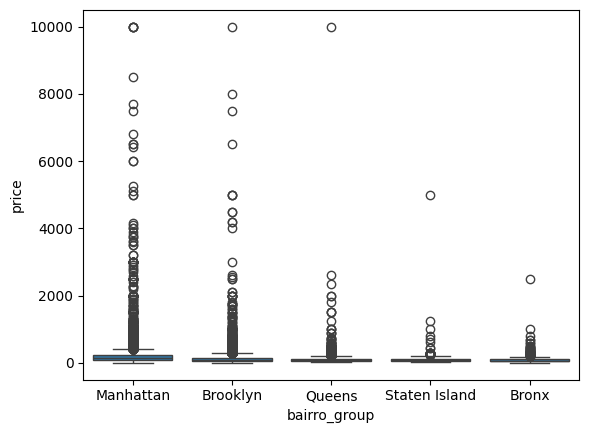

In [ ]:
sns.boxplot(data=dados, x='bairro_group', y='price')
plt.show()

In [50]:
# Top 5 bairros com mais listagens
top_bairros = dados['bairro'].value_counts().head(5)
print(top_bairros)

bairro
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: count, dtype: int64


Pode-se perceber que os outliers influ√™nciam na m√©dia do pre√ßo. No caso, para calcular o real pre√ßo m√©dio que normalmente √© praticado em um grupo de bairros seria necess√°rio retirar os outiliers.

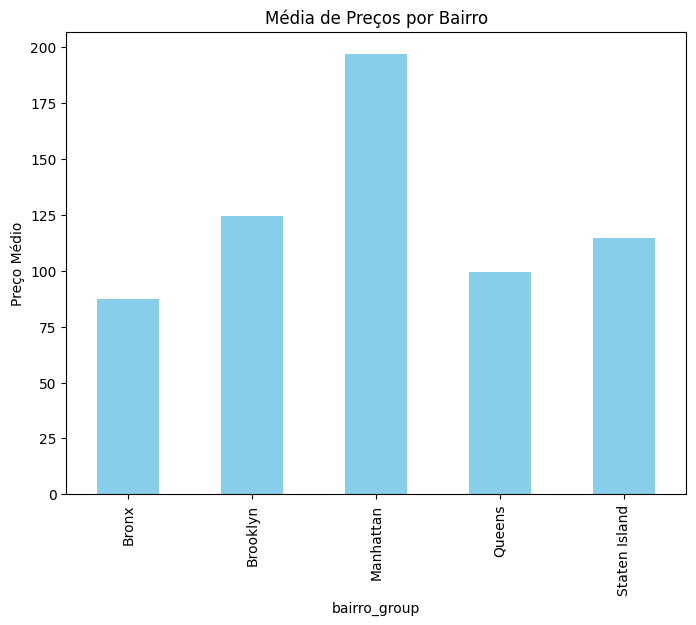

In [52]:
avg_price_bairro = dados.groupby('bairro_group')['price'].mean()
avg_price_bairro.plot(kind='bar', title='M√©dia de Pre√ßos por Bairro', figsize=(8, 6), color='skyblue')
plt.ylabel('Pre√ßo M√©dio')
plt.show()

Distribui√ß√£o de Pre√ßos por Tipo de Quarto (Boxplot)

"Entire home/apt" (Casa/Apartamento inteiro) tem os pre√ßos mais elevados, com outliers acima de $10.000. A mediana √© visivelmente maior do que os outros tipos de quarto.

"Private room" (Quarto privado) apresenta pre√ßos menores em compara√ß√£o com im√≥veis inteiros, mas ainda assim h√° alguns outliers acima de 4.000.
"Shared room" (Quarto compartilhado) tem os pre√ßos mais baixos, com poucos outliers acima de 2.000.

A dispers√£o dos pre√ßos √© muito maior para "Entire home/apt", indicando uma grande variedade de pre√ßos dentro dessa categoria.

Conclus√µes:

Im√≥veis inteiros s√£o os mais caros, provavelmente porque oferecem mais privacidade e comodidades.
Quartos privados e compartilhados tendem a ser mais acess√≠veis, mas ainda h√° exce√ß√µes com pre√ßos elevados.
Os outliers podem representar acomoda√ß√µes de luxo ou erros nos dados, sendo necess√°rio investigar a causa desses valores extremos.

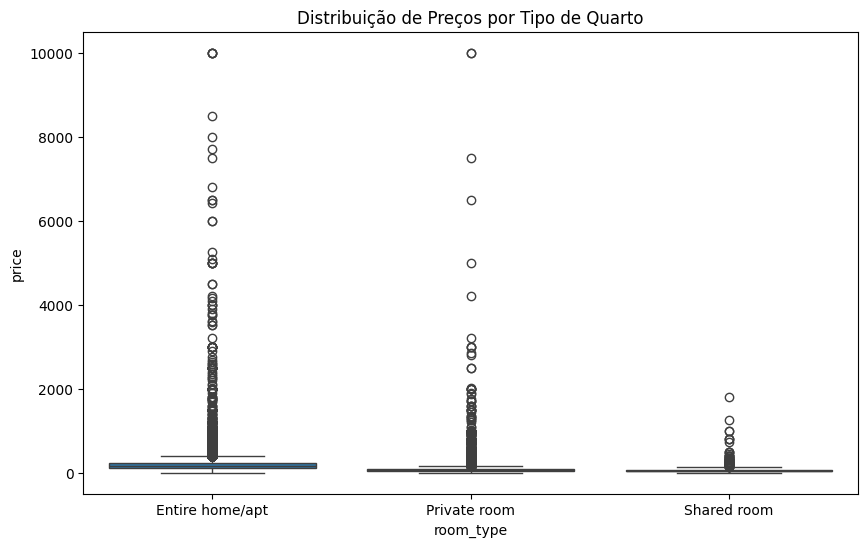

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados, x='room_type', y='price')
plt.title('Distribui√ß√£o de Pre√ßos por Tipo de Quarto')
plt.show()

Rela√ß√£o entre Avalia√ß√µes por M√™s e Pre√ßo (Scatter Plot)

A maioria dos an√∫ncios com pre√ßos muito elevados (5.000 - 10.000 d√≥lares) tem poucas avalia√ß√µes por m√™s.
Os im√≥veis mais bem avaliados por m√™s (10+ avalia√ß√µes) geralmente t√™m pre√ßos mais baixos, abaixo de 500 d√≥lares.

Conclus√µes:

Acomoda√ß√µes caras tendem a ter menos avalia√ß√µes, o que pode indicar que s√£o menos populares ou voltadas para um p√∫blico de nicho.
Os im√≥veis mais acess√≠veis s√£o os mais reservados, o que sugere que a demanda √© maior para listagens com pre√ßos competitivos.
√â poss√≠vel que im√≥veis com pre√ßos elevados fiquem dispon√≠veis por mais tempo, enquanto os baratos t√™m alta rotatividade.


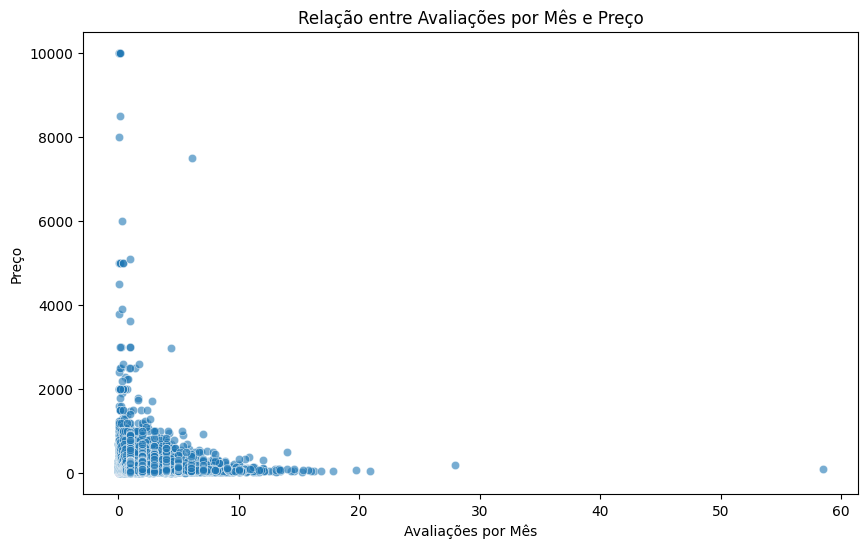

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='reviews_por_mes', y='price', alpha=0.6)
plt.title('Rela√ß√£o entre Avalia√ß√µes por M√™s e Pre√ßo')
plt.xlabel('Avalia√ß√µes por M√™s')
plt.ylabel('Pre√ßo')
plt.show()

Correla√ß√£o entre as vari√°veis.

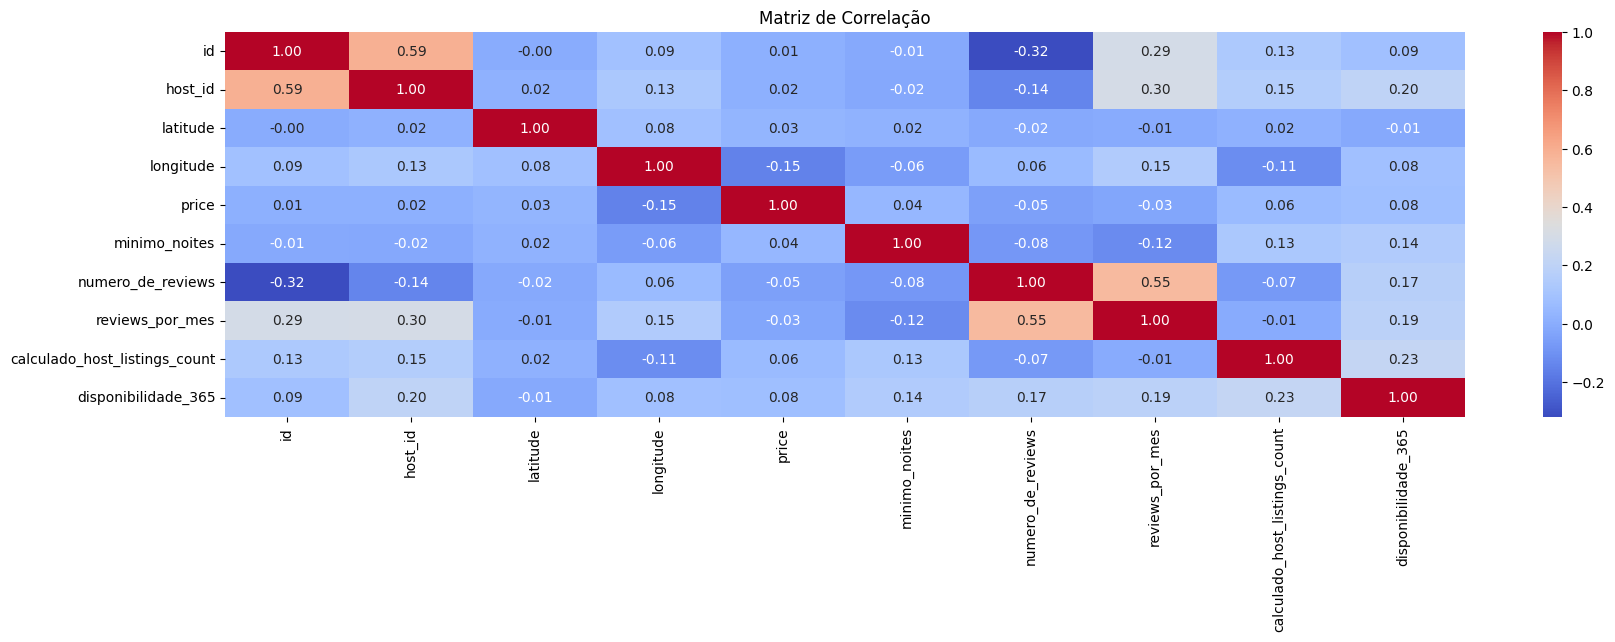

In [48]:
# Selecionar apenas colunas num√©ricas
dados_numericos = dados.select_dtypes(include=['number'])

# Criar matriz de correla√ß√£o
correlation_matrix = dados_numericos.corr()

# Plotar o heatmap
plt.figure(figsize=(20, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correla√ß√£o")
plt.show()

H√° 37457 usu√°rios diferentes que hospedaram algum an√∫ncio

In [ ]:
dados['host_id'].nunique()

37457

Calculando estat√≠sticas para os Hosts.

In [ ]:
# Contar o n√∫mero de an√∫ncios por host_id
host_listings = dados['host_id'].value_counts().reset_index()
host_listings.columns = ['host_id', 'num_listings']

# Calcular estat√≠sticas adicionais por host_id
stats_por_host = dados.groupby('host_id').agg({
    'bairro': lambda x: x.mode()[0] if not x.mode().empty else None,  # Bairro mais frequente
    'bairro_group': lambda x: x.mode()[0] if not x.mode().empty else None,  # Bairro_group mais frequente
    'price': 'mean',  # Pre√ßo m√©dio
    'minimo_noites': 'mean',  # M√≠nimo de noites m√©dio
    'numero_de_reviews': 'mean',  # N√∫mero m√©dio de reviews
    'reviews_por_mes': 'mean',  # Reviews por m√™s m√©dio
    'calculado_host_listings_count': 'first',  # Quantidade de listagens por host (j√° vem no dataset)
    'disponibilidade_365': 'mean'  # M√©dia de disponibilidade ao longo do ano
}).reset_index()

# Unir estat√≠sticas com o DataFrame de contagem
hosts_multiplos = host_listings.merge(stats_por_host, on='host_id')

# Mesclar com os nomes dos hosts
hosts_multiplos = hosts_multiplos.merge(dados[['host_id', 'host_name']].drop_duplicates(), on='host_id')

# Exibir os 10 hosts com mais an√∫ncios
print(f"Total de hosts com mais de um an√∫ncio: {len(hosts_multiplos[hosts_multiplos['num_listings'] > 1])}")
#print(hosts_multiplos.sort_values(by='num_listings', ascending=False).head(10))


Total de hosts com mais de um an√∫ncio: 5154


Dataset ordenado pelo n√∫mero de an√∫ncios por host.

Dos 10 Hosts com mais an√∫ncios 8 investem mais no distrito de Manhattan.

Hosts profissionais vs. amadores: Hosts com muitos an√∫ncios geralmente s√£o profissionais ou empresas especializadas no mercado de aluguel, enquanto hosts com poucos an√∫ncios tendem a ser indiv√≠duos que alugam propriedades de forma casual. Uma alta concentra√ß√£o de an√∫ncios em poucos hosts pode indicar uma profissionaliza√ß√£o do mercado.

Impacto na competitividade: Se a maioria dos an√∫ncios em um bairro ou regi√£o for controlada por poucos hosts, isso pode aumentar a competi√ß√£o para novos investidores que entram nesse mercado, especialmente em bairros mais populares.

Hosts com muitos an√∫ncios podem ditar pre√ßos: Esses anfitri√µes geralmente t√™m experi√™ncia no mercado e podem influenciar os pre√ßos da regi√£o, tanto para cima (em locais de alta demanda) quanto para baixo (para atrair mais h√≥spedes em locais menos populares).

Estrat√©gias de precifica√ß√£o avan√ßadas: Hosts com muitos im√≥veis podem usar ferramentas de precifica√ß√£o din√¢mica, ajustando os pre√ßos com base na sazonalidade, demanda e eventos locais, o que pode distorcer a m√©dia dos pre√ßos na regi√£o.

Bairros espec√≠ficos como foco: Analisando onde esses hosts concentram seus im√≥veis, voc√™ pode identificar bairros com alta atratividade para investimentos ou regi√µes com grande potencial de crescimento.

Dom√≠nio de mercados locais: Se os hosts mais ativos se concentram em determinados bairros, isso pode indicar que essas √°reas oferecem alta rentabilidade ou popularidade entre os h√≥spedes.

*Conclus√µes Poss√≠veis*

Mercado Concentrado ou Fragmentado: Voc√™ pode verificar se o mercado √© dominado por poucos hosts profissionais ou se √© mais fragmentado, com muitos hosts individuais. Isso ajuda a entender a acessibilidade do mercado para novos investidores.

Identificar Oportunidades: Hosts com muitos an√∫ncios podem indicar bairros ou regi√µes com alta atratividade e potencial de crescimento.

Avaliar Competitividade: A presen√ßa de hosts dominantes pode significar alta competitividade, exigindo estrat√©gias mais sofisticadas para se destacar.

Estabilidade e Experi√™ncia: Hosts com muitos im√≥veis podem trazer estabilidade ao mercado, mas tamb√©m criar desafios para hosts menores que competem diretamente.



In [ ]:
hosts_multiplos.sort_values(by='num_listings', ascending=False).head(10)

host_id  num_listings              bairro bairro_group       price  \
0  219517861           327  Financial District    Manhattan  253.195719   
1  107434423           232             Chelsea    Manhattan  303.150862   
2   30283594           121      Hell's Kitchen    Manhattan  277.528926   
3  137358866           103            Woodside       Queens   43.825243   
4   12243051            96  Financial District    Manhattan  213.031250   
5   16098958            96             Midtown    Manhattan  208.958333   
6   61391963            91            Kips Bay    Manhattan  146.241758   
7   22541573            87             Chelsea    Manhattan  215.436782   
8  200380610            65             Midtown    Manhattan  290.230769   
9    7503643            52          Greenpoint     Brooklyn  149.192308   

   minimo_noites  numero_de_reviews  reviews_por_mes  \
0      13.311927           3.917431         1.920580   
1      32.198276           0.125000         0.215714   
2      31.132231           0.537190         0.091628   
3      30.000000           0.844660         0.444706   
4      29.000000           0.447917         0.298276   
5      30.000000           1.437500         0.119672   
6      30.329670           4.582418         0.268101   
7      30.000000           0.632184         0.108974   
8      33.692308           0.015385         1.000000   
9      30.000000           4.653846         0.101224   

   calculado_host_listings_count  disponibilidade_365          host_name  
0                            327           301.492355       Sonder (NYC)  
1                            232           253.810345         Blueground  
2                            121           313.421488               Kara  
3                            103           196.475728             Kazuya  
4                             96           276.614583             Sonder  
5                             96           292.322917     Jeremy & Laura  
6                             91           241.923077  Corporate Housing  
7                             87           312.172414                Ken  
8                             65           338.030769            Pranjal  
9                             52           297.711538               Vida

In [ ]:
# Contar o n√∫mero de an√∫ncios por host_id
host_listings = dados['host_id'].value_counts()

# Selecionar os 10 hosts com mais an√∫ncios
top_10_hosts = host_listings.head(10)

In [ ]:
# Filtrar o dataframe original para os 10 maiores hosts
top_hosts_ids = top_10_hosts.index  # IDs dos 10 hosts com mais an√∫ncios
top_hosts_data = dados[dados['host_id'].isin(top_hosts_ids)]


Resumo dos pre√ßos por noite em d√≥lares no formato de estat√≠sticas descritivas.

In [ ]:
# Resumo dos pre√ßos por host
price_summary = top_hosts_data.groupby('host_id')['price'].describe()
print(price_summary)


           count        mean         std    min     25%    50%    75%     max
host_id                                                                      
7503643     52.0  149.192308   21.737325  129.0  129.00  149.0  159.0   199.0
12243051    96.0  213.031250   41.744197  125.0  182.00  209.5  239.0   377.0
16098958    96.0  208.958333   74.615494  117.0  163.75  180.0  250.0   550.0
22541573    87.0  215.436782   35.533705  149.0  189.50  210.0  245.0   289.0
30283594   121.0  277.528926  159.004930  109.0  219.00  239.0  269.0  1170.0
61391963    91.0  146.241758   23.691696  109.0  125.00  142.0  159.0   200.0
107434423  232.0  303.150862   54.599673  184.0  267.00  302.5  330.5   481.0
137358866  103.0   43.825243   10.421911   24.0   37.00   41.0   50.0    76.0
200380610   65.0  290.230769  109.990308  150.0  200.00  250.0  350.0   600.0
219517861  327.0  253.195719  119.586884  100.0  188.50  228.0  255.0   699.0


Distribui√ß√£o dos pre√ßos dos 10 hosts que mais possuem an√∫ncios.

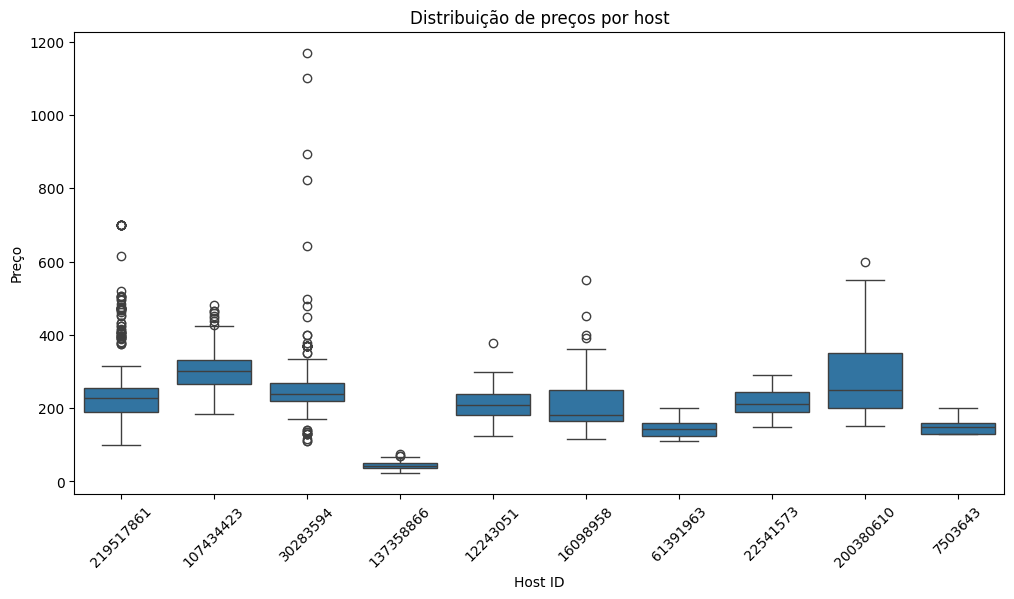

In [ ]:
# Boxplot para pre√ßos dos 10 hosts
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_hosts_data, x='host_id', y='price', order=top_hosts_ids)
plt.title('Distribui√ß√£o de pre√ßos por host')
plt.xlabel('Host ID')
plt.ylabel('Pre√ßo')
plt.xticks(rotation=45)
plt.show()


V√°rios dos maiores hosts investem nos mesmos bairros. Isso pode indicar forte competi√ß√£o nesses bairros, principalmente para para novos e pequenos investidores. Por outro, pode ser uma oportunidade atrativa para grandes investidores que trabalham com strat√©gias mais sofisticadas para se destacar. Pois podem ter processos mais bem definidos, como limpeza, atendimento ao cliente e gerenciamento de reservas, o que pode resultar em melhores avalia√ß√µes e atrair mais h√≥spedes.

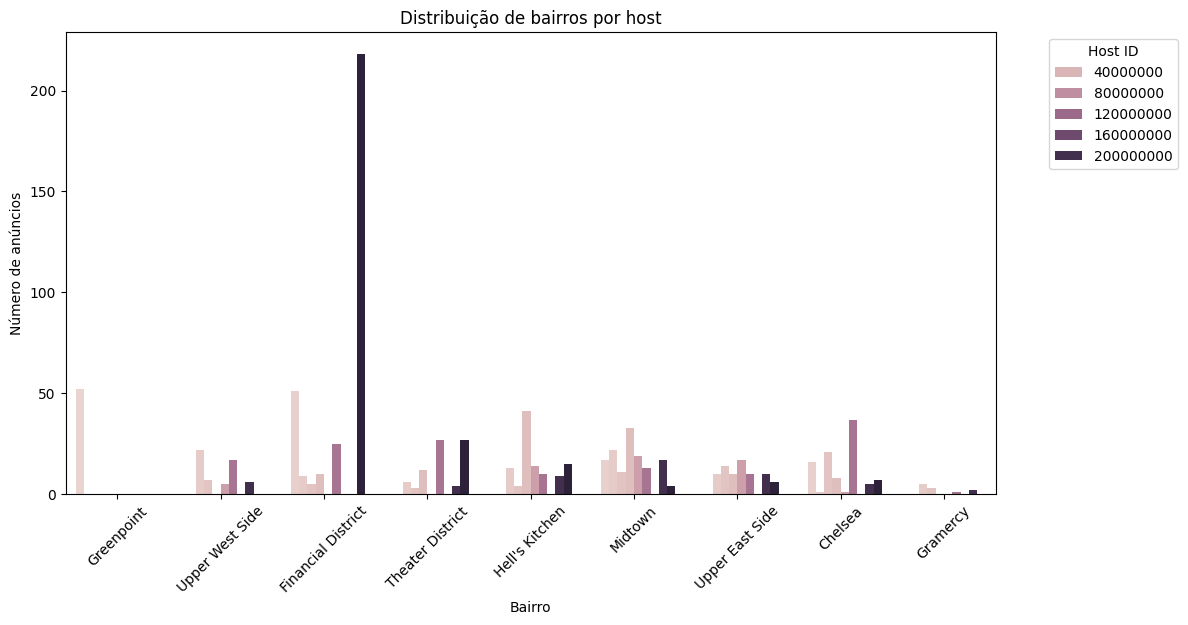

In [ ]:
# Gr√°fico de barras para bairros
plt.figure(figsize=(12, 6))
sns.countplot(data=top_hosts_data, x='bairro', order=top_hosts_data['bairro'][0:100].value_counts().index, hue='host_id')
plt.title('Distribui√ß√£o de bairros por host')
plt.xlabel('Bairro')
plt.ylabel('N√∫mero de an√∫ncios')
plt.legend(title='Host ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


Mapa com os 20 Bairros com mais an√∫ncios e os hosts que mais investem nesses bairros, juntamente com o pre√ßo m√©dio por bairro.

In [ ]:
# Calcular pre√ßo m√©dio e n√∫mero de an√∫ncios por bairro
avg_price_by_bairro = dados.groupby('bairro')['price'].mean().reset_index()
avg_price_by_bairro.columns = ['bairro', 'avg_price']

num_listings_by_bairro = dados.groupby('bairro')['id'].count().reset_index()
num_listings_by_bairro.columns = ['bairro', 'num_listings']

# Calcular coordenadas m√©dias para cada bairro
coords_by_bairro = dados.groupby('bairro')[['latitude', 'longitude']].mean().reset_index()

# Encontrar o host mais ativo por bairro
host_mais_ativo_por_bairro = (
    dados.groupby(['bairro', 'host_name'])['id'].count()
    .reset_index()
    .sort_values(['bairro', 'id'], ascending=[True, False])
    .groupby('bairro')
    .first()
    .reset_index()
)
host_mais_ativo_por_bairro.columns = ['bairro', 'host_name', 'num_listings_host']

# Mesclar todas as informa√ß√µes em um √∫nico DataFrame
bairro_data = (
    avg_price_by_bairro
    .merge(num_listings_by_bairro, on='bairro')
    .merge(coords_by_bairro, on='bairro')
    .merge(host_mais_ativo_por_bairro, on='bairro')
)

# Filtrar os 10 bairros com mais an√∫ncios
top_bairros = bairro_data.sort_values(by='num_listings', ascending=False).head(20)

# Criar um mapa base centrado em Nova York
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Adicionar um HeatMap com os pre√ßos m√©dios por bairro
heat_data = [[row['latitude'], row['longitude'], row['avg_price']] for index, row in bairro_data.iterrows()]
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(nyc_map)

# Adicionar marcadores para os 10 bairros com mais an√∫ncios
for index, row in top_bairros.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=(
            f"Bairro: {row['bairro']}<br>"
            f"An√∫ncios: {row['num_listings']}<br>"
            f"Pre√ßo m√©dio: ${row['avg_price']:.2f}<br>"
            f"Host mais ativo: {row['host_name']} ({row['num_listings_host']} an√∫ncios)"
        ),
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(nyc_map)

# Mostrar o mapa
nyc_map


In [ ]:
# Calcular m√©tricas agregadas por bairro
bairro_analysis = dados.groupby('bairro').agg({
    'price': 'mean',
    'disponibilidade_365': 'mean',
    'minimo_noites': 'mean',
    'numero_de_reviews': 'mean',
    'id': 'count'  # N√∫mero de an√∫ncios
}).reset_index()

bairro_analysis.rename(columns={
    'price': 'avg_price',
    'disponibilidade_365': 'avg_disponibilidade',
    'minimo_noites': 'avg_minimo_noites',
    'numero_de_reviews': 'avg_num_reviews',
    'id': 'num_listings'
}, inplace=True)

# Calcular receita m√©dia potencial
bairro_analysis['receita_potencial'] = (
    (bairro_analysis['avg_price'] * bairro_analysis['avg_disponibilidade']) / bairro_analysis['avg_minimo_noites']
)

# Classificar bairros pela receita potencial
bairro_analysis = bairro_analysis.sort_values(by='receita_potencial', ascending=False)

# Exibir os melhores bairros para investimento
bairro_analysis[['bairro', 'receita_potencial', 'avg_price', 'num_listings', 'avg_num_reviews']].head(10)


bairro  receita_potencial   avg_price  num_listings  \
82   Fort Wadsworth       41714.285714  800.000000             1   
161   Randall Manor       35856.000000  336.000000            19   
139        Neponsit       31724.000000  274.666667             3   
65      Eastchester       27919.825175  141.692308            13   
129      Mill Basin       23167.777778  179.750000             4   
215     Willowbrook       21849.750000  249.000000             1   
21     Breezy Point       21404.444444  213.333333             3   
208      West Farms       19886.000000  122.000000             2   
3           Arverne       19624.761530  171.779221            77   
14     Belle Harbor       18289.250000  171.500000             8   

     avg_num_reviews  
82          0.000000  
161        18.000000  
139        15.333333  
65         12.076923  
129        17.250000  
215         9.000000  
21          1.666667  
208         3.500000  
3          29.259740  
14          9.250000

Compara√ß√£o dos bairros onde a compet√ß√£o √© alta em compara√ß√£o com bairros de pouca competi√ß√£o, em rela√ß√£o a m√©tricas como receita pot√™ncial pre√ßo m√©dio, n√∫mero de reviews e n√∫mero de an√∫ncios. Foi constatado que bairros com baixa competi√ß√£o t√™m um n√∫mero de coment√°rios semelhante aos bairros mais competidos. Como de esperado, bairros com menos oferta t√™m menos an√∫ncios, maso pre√ßo m√©dio √© semelhante ao de bairros com muitos an√∫ncios. Al√©m disso, a receita pot√™ncia tende a ser maior do que se o investidor fosse aplicar seu dinheiro em bairros com profissionais consolidados e com muitos apartamentos, pois a competi√ß√£o seria bem mais alta e com a demanda alta os pre√ßos poderiam cair e, dessa forma, ocasionar um mau investimento.

         competicao  receita_potencial   avg_price  avg_num_reviews  \
0   Alta Competi√ß√£o        3479.757741  141.609807        25.054081   
1  Baixa Competi√ß√£o        7460.477864  124.959601        22.677323   

   num_listings  
0    432.518182  
1     11.864865  


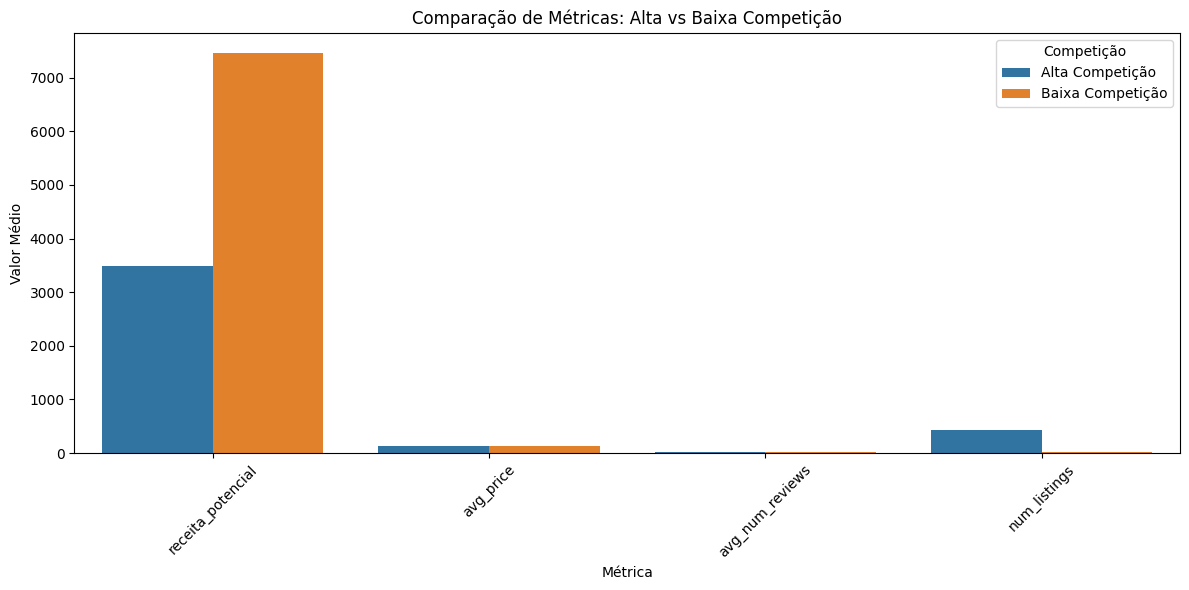

In [ ]:
# Calcular o ponto de corte baseado na mediana
mediana_listings = bairro_analysis['num_listings'].median()

# Classificar os bairros em alta ou baixa competi√ß√£o
bairro_analysis['competicao'] = bairro_analysis['num_listings'].apply(
    lambda x: 'Alta Competi√ß√£o' if x > mediana_listings else 'Baixa Competi√ß√£o'
)

# Comparar m√©tricas entre os grupos
comparacao_grupos = bairro_analysis.groupby('competicao').agg({
    'receita_potencial': 'mean',
    'avg_price': 'mean',
    'avg_num_reviews': 'mean',
    'num_listings': 'mean'
}).reset_index()

print(comparacao_grupos)

# Visualizar a compara√ß√£o
plt.figure(figsize=(12, 6))
sns.barplot(data=comparacao_grupos.melt(id_vars='competicao'),
            x='variable', y='value', hue='competicao')
plt.title('Compara√ß√£o de M√©tricas: Alta vs Baixa Competi√ß√£o')
plt.ylabel('Valor M√©dio')
plt.xlabel('M√©trica')
plt.xticks(rotation=45)
plt.legend(title='Competi√ß√£o')
plt.tight_layout()
plt.show()


**Responda tamb√©m √†s seguintes perguntas:**


Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?


Resposta: Abaixo s√£o listados os 20 bairros mais indicados para hosts comprarem apartamentos com o intuito de alugarem posteriormente.

Foram criadas m√©tricas para gera√ß√£o de um score de investimento:


C√°lculo do pre√ßo m√©dio (avg_price):
Calcula o pre√ßo m√©dio de aluguel por bairro. Este valor √© importante para avaliar a receita potencial de alugu√©is.

N√∫mero de an√∫ncios (num_listings):
Conta quantos an√∫ncios existem em cada bairro, indicando o n√≠vel de competi√ß√£o.

N√∫mero m√©dio de avalia√ß√µes (avg_num_reviews):
Calcula a m√©dia de avalia√ß√µes por bairro. Um maior n√∫mero de avalia√ß√µes pode ser um indicador de bairros populares entre os h√≥spedes.
Essas tr√™s m√©tricas fornecem uma base para avaliar a atratividade de cada bairro.

C√°lculo da receita potencial

receita_potencial:
Multiplica o pre√ßo m√©dio (avg_price) pela disponibilidade m√©dia (availability_365), estimando a receita anual que pode ser obtida de cada an√∫ncio. Isso √© diretamente relevante para investidores, pois √© uma m√©trica financeira crucial para prever ganhos.

Normaliza√ß√£o das vari√°veis

Utiliza o MinMaxScaler para normalizar tr√™s vari√°veis:
receita_potencial (norm_receita): Representa o potencial financeiro em uma escala de 0 a 1.
avg_num_reviews (norm_reviews): Representa a atratividade do bairro com base no engajamento dos h√≥spedes.
num_listings (norm_competicao): Representa o n√≠vel de competi√ß√£o, onde valores mais altos indicam maior concorr√™ncia.

Cria√ß√£o do score de investimento

F√≥rmula do score_investimento:

D√° maior peso ao potencial financeiro (norm_receita), menor peso √† popularidade (norm_reviews), e penaliza a competi√ß√£o (norm_competicao).
F√≥rmula:


score_investimento=0.5√ónorm_receita+0.25√ónorm_reviews‚àí0.25√ónorm_competicao

Esse c√°lculo captura o equil√≠brio entre receita potencial, atratividade e risco competitivo, que s√£o os principais fatores para a decis√£o de investimento.

Ordena os bairros pelo score_investimento em ordem decrescente e seleciona os 20 melhores.

Em resumo, este c√≥digo identifica os melhores bairros para investir, combinando receita potencial, popularidade e competi√ß√£o em uma m√©trica clara e ordenada, respondendo diretamente √† pergunta com base em uma an√°lise fundamentada em dados. Ressaltasse que algumas outra vari√°veis poderiam ser inclu√≠das como: tr√¢nsito da cidade, dist√¢ncia at√© o centro da cidade e locais comerciais, quantidade de habitantes da cidade, dados de seguran√ßa p√∫blica e sa√∫de, etc.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Supondo que 'dados' seja o DataFrame original com as colunas 'bairro' e 'bairro_group'

# Calcular pre√ßo m√©dio, n√∫mero de an√∫ncios e n√∫mero m√©dio de avalia√ß√µes por bairro
avg_price_by_bairro = dados.groupby('bairro')['price'].mean().reset_index()
avg_price_by_bairro.columns = ['bairro', 'avg_price']

num_listings_by_bairro = dados.groupby('bairro')['id'].count().reset_index()
num_listings_by_bairro.columns = ['bairro', 'num_listings']

avg_reviews_by_bairro = dados.groupby('bairro')['numero_de_reviews'].mean().reset_index()
avg_reviews_by_bairro.columns = ['bairro', 'avg_num_reviews']

# Mesclar todas as informa√ß√µes em um √∫nico DataFrame
bairro_analysis = avg_price_by_bairro.merge(num_listings_by_bairro, on='bairro').merge(avg_reviews_by_bairro, on='bairro')

# Adicionar a coluna 'bairro_group'
bairro_group_mapping = dados[['bairro', 'bairro_group']].drop_duplicates()  # Evitar duplicados
bairro_analysis = bairro_analysis.merge(bairro_group_mapping, on='bairro', how='left')

# Verificar se a coluna 'availability_365' est√° no DataFrame original
if 'availability_365' in dados.columns:
    disponibilidade_por_bairro = dados.groupby('bairro')['availability_365'].mean().reset_index()
    disponibilidade_por_bairro.columns = ['bairro', 'disponibilidade_365']
    bairro_analysis = bairro_analysis.merge(disponibilidade_por_bairro, on='bairro', how='left')
else:
    print("A coluna 'availability_365' n√£o est√° presente no DataFrame. Usando valor padr√£o de 365 dias.")
    bairro_analysis['disponibilidade_365'] = 365  # Valor padr√£o de disponibilidade

# Calcular a receita potencial: pre√ßo m√©dio * disponibilidade m√©dia
bairro_analysis['receita_potencial'] = bairro_analysis['avg_price'] * bairro_analysis['disponibilidade_365']

# Normalizar as vari√°veis de receita, n√∫mero de avalia√ß√µes e competi√ß√£o
scaler = MinMaxScaler()
bairro_analysis[['norm_receita', 'norm_reviews', 'norm_competicao']] = scaler.fit_transform(
    bairro_analysis[['receita_potencial', 'avg_num_reviews', 'num_listings']]
)

# Criar score de investimento: maior receita e avalia√ß√µes, menor competi√ß√£o
bairro_analysis['score_investimento'] = (
    0.5 * bairro_analysis['norm_receita'] +
    0.25 * bairro_analysis['norm_reviews'] -
    0.25 * bairro_analysis['norm_competicao']
)

# Ordenar os bairros pelo score de investimento
melhores_bairros = bairro_analysis.sort_values(by='score_investimento', ascending=False).head(20)

# Exibir os melhores bairros com o grupo correspondente
melhores_bairros[['bairro', 'bairro_group', 'receita_potencial', 'avg_price', 'num_listings', 'avg_num_reviews', 'score_investimento']]


A coluna 'availability_365' n√£o est√° presente no DataFrame. Usando valor padr√£o de 365 dias.


bairro   bairro_group  receita_potencial   avg_price  \
82        Fort Wadsworth  Staten Island      292000.000000  800.000000   
219              Woodrow  Staten Island      255500.000000  700.000000   
167            Riverdale          Bronx      161363.181818  442.090909   
197              Tribeca      Manhattan      179083.022599  490.638418   
174             Sea Gate       Brooklyn      178067.857143  487.857143   
177          Silver Lake  Staten Island       25550.000000   70.000000   
157         Prince's Bay  Staten Island      149467.500000  409.500000   
161        Randall Manor  Staten Island      122640.000000  336.000000   
75     Flatiron District      Manhattan      124802.625000  341.925000   
6      Battery Park City      Manhattan      134158.357143  367.557143   
69           Eltingville  Staten Island       51708.333333  141.666667   
165         Richmondtown  Staten Island       28470.000000   78.000000   
144                 NoHo      Manhattan      107937.051282  295.717949   
139             Neponsit         Queens      100253.333333  274.666667   
59         East Elmhurst         Queens       29632.081081   81.183784   
178                 SoHo      Manhattan      104792.723464  287.103352   
53                 DUMBO       Brooklyn       71651.527778  196.305556   
183  Springfield Gardens         Queens       34395.882353   94.235294   
36           City Island          Bronx       63145.000000  173.000000   
43           Cobble Hill       Brooklyn       77354.191919  211.929293   

     num_listings  avg_num_reviews  score_investimento  
82              1         0.000000            0.500000  
219             1         0.000000            0.433570  
167            11        26.636364            0.317796  
197           177        11.491525            0.307506  
174             7         1.428571            0.295273  
177             2       118.500000            0.264994  
157             4         5.750000            0.252528  
161            19        18.000000            0.228589  
75             80        17.737500            0.228080  
6              70         8.285714            0.225805  
69              3        76.000000            0.222876  
165             1        79.000000            0.187039  
144            78        12.743590            0.186976  
139             3        15.333333            0.183240  
59            185        81.659459            0.183027  
178           358        20.209497            0.179143  
53             36        38.388889            0.177719  
183            85        69.094118            0.171567  
36             18        42.166667            0.171356  
43             99        29.171717            0.164634

Abaixo s√£o mostrados os bairros menos interessantes para investimentos segundo os crit√©rios adotados.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Supondo que 'dados' seja o DataFrame original com as colunas 'bairro' e 'bairro_group'

# Calcular pre√ßo m√©dio, n√∫mero de an√∫ncios e n√∫mero m√©dio de avalia√ß√µes por bairro
avg_price_by_bairro = dados.groupby('bairro')['price'].mean().reset_index()
avg_price_by_bairro.columns = ['bairro', 'avg_price']

num_listings_by_bairro = dados.groupby('bairro')['id'].count().reset_index()
num_listings_by_bairro.columns = ['bairro', 'num_listings']

avg_reviews_by_bairro = dados.groupby('bairro')['numero_de_reviews'].mean().reset_index()
avg_reviews_by_bairro.columns = ['bairro', 'avg_num_reviews']

# Mesclar todas as informa√ß√µes em um √∫nico DataFrame
bairro_analysis = avg_price_by_bairro.merge(num_listings_by_bairro, on='bairro').merge(avg_reviews_by_bairro, on='bairro')

# Adicionar a coluna 'bairro_group'
bairro_group_mapping = dados[['bairro', 'bairro_group']].drop_duplicates()  # Evitar duplicados
bairro_analysis = bairro_analysis.merge(bairro_group_mapping, on='bairro', how='left')

# Verificar se a coluna 'availability_365' est√° no DataFrame original
if 'availability_365' in dados.columns:
    disponibilidade_por_bairro = dados.groupby('bairro')['availability_365'].mean().reset_index()
    disponibilidade_por_bairro.columns = ['bairro', 'disponibilidade_365']
    bairro_analysis = bairro_analysis.merge(disponibilidade_por_bairro, on='bairro', how='left')
else:
    print("A coluna 'availability_365' n√£o est√° presente no DataFrame. Usando valor padr√£o de 365 dias.")
    bairro_analysis['disponibilidade_365'] = 365  # Valor padr√£o de disponibilidade

# Calcular a receita potencial: pre√ßo m√©dio * disponibilidade m√©dia
bairro_analysis['receita_potencial'] = bairro_analysis['avg_price'] * bairro_analysis['disponibilidade_365']

# Normalizar as vari√°veis de receita, n√∫mero de avalia√ß√µes e competi√ß√£o
scaler = MinMaxScaler()
bairro_analysis[['norm_receita', 'norm_reviews', 'norm_competicao']] = scaler.fit_transform(
    bairro_analysis[['receita_potencial', 'avg_num_reviews', 'num_listings']]
)

# Criar score de investimento: maior receita e avalia√ß√µes, menor competi√ß√£o
bairro_analysis['score_investimento'] = (
    0.5 * bairro_analysis['norm_receita'] +
    0.25 * bairro_analysis['norm_reviews'] -
    0.25 * bairro_analysis['norm_competicao']
)

# Ordenar os bairros pelo score de investimento
piores_bairros = bairro_analysis.sort_values(by='score_investimento', ascending=False).tail(20)

# Exibir os melhores bairros com o grupo correspondente
piores_bairros[['bairro', 'bairro_group', 'receita_potencial', 'avg_price', 'num_listings', 'avg_num_reviews', 'score_investimento']]


A coluna 'availability_365' n√£o est√° presente no DataFrame. Usando valor padr√£o de 365 dias.


bairro   bairro_group  receita_potencial   avg_price  \
95       Hell's Kitchen      Manhattan       74749.874872  204.794178   
74             Flatbush       Brooklyn       33657.584541   92.212560   
27          Bull's Head  Staten Island       17276.666667   47.333333   
166           Ridgewood         Queens       28172.304965   77.184397   
91           Greenpoint       Brooklyn       52860.183857  144.822422   
1         Arden Heights  Staten Island       24546.250000   67.250000   
149           Olinville          Bronx       23360.000000   64.000000   
116         Little Neck         Queens       27448.000000   75.200000   
148             Oakwood  Staten Island       29638.000000   81.200000   
64         East Village      Manhattan       67920.334593  186.083108   
102         Hunts Point          Bronx       18432.500000   50.500000   
202     Upper West Side      Manhattan       76985.185185  210.918316   
201     Upper East Side      Manhattan       68966.120690  188.948276   
206  Washington Heights      Manhattan       32707.897664   89.610679   
141            New Dorp  Staten Island       20805.000000   57.000000   
51        Crown Heights       Brooklyn       41055.265345  112.480179   
94               Harlem      Manhattan       43425.524831  118.974041   
28             Bushwick       Brooklyn       30952.148073   84.800406   
13   Bedford-Stuyvesant       Brooklyn       39302.559235  107.678244   
214        Williamsburg       Brooklyn       52488.024235  143.802806   

     num_listings  avg_num_reviews  score_investimento  
95           1958        25.652196            0.033880  
74            621        20.590982            0.033703  
27              6        15.333333            0.032030  
166           423        18.387707            0.031703  
91           1115        17.425112            0.030460  
1               4         7.750000            0.029390  
149             4         7.500000            0.026703  
116             5         3.800000            0.026274  
148             5         1.800000            0.026040  
64           1853        24.106854            0.024888  
102            18         9.777778            0.021647  
202          1971        18.294267            0.021596  
201          1798        17.622914            0.016621  
206           899        19.088988            0.011072  
141             1         0.000000            0.006422  
51           1564        23.278772           -0.007318  
94           2658        28.578631           -0.061611  
28           2465        21.303854           -0.087349  
13           3714        29.712439           -0.134087  
214          3920        21.792602           -0.139939

In [ ]:
bairros_maiores_hosts = hosts_multiplos.sort_values(by='num_listings', ascending=False)['bairro'].head(10).to_list()

In [ ]:
bairros_maiores_hosts

['Financial District',
 'Chelsea',
 "Hell's Kitchen",
 'Woodside',
 'Financial District',
 'Midtown',
 'Kips Bay',
 'Chelsea',
 'Midtown',
 'Greenpoint']

Dentre os bairros com os maiores hosts dois aparecem na lista dos menos atrativos para investimento, mas os outros tamb√©m n√£o s√£o muito atrativos segundo as m√©tricas adotadas.

In [ ]:
bairro_analysis[bairro_analysis['bairro'].isin(bairros_maiores_hosts)][['bairro', 'bairro_group', 'receita_potencial', 'avg_price', 'num_listings', 'avg_num_reviews', 'score_investimento']]

bairro bairro_group  receita_potencial   avg_price  \
34              Chelsea    Manhattan       91154.568733  249.738544   
73   Financial District    Manhattan       82304.065860  225.490591   
91           Greenpoint     Brooklyn       52860.183857  144.822422   
95       Hell's Kitchen    Manhattan       74749.874872  204.794178   
112            Kips Bay    Manhattan       73879.106383  202.408511   
127             Midtown    Manhattan      103192.469256  282.719094   
220            Woodside       Queens       31060.723404   85.097872   

     num_listings  avg_num_reviews  score_investimento  
34           1113        21.240791            0.108334  
73            744         9.315860            0.090607  
91           1115        17.425112            0.030460  
95           1958        25.652196            0.033880  
112           470        12.419149            0.099300  
127          1545        12.585113            0.084424  
220           235        21.425532            0.055361

No mapa abaixo s√£o mostrados os 20 melhores bairros para investimento em apartamentos segundo os crit√©rios escolhidos. No mapa pode-se ver o bairro, o distrito ao qual o bairro pertence, a receita pot√™ncial, o pre√ßo m√©dio por noite, o n√∫mero de an√∫ncios no bairro, o n√∫mero m√©dio de avalia√ß√µes e o score de investimento.

In [ ]:
# Calcular pre√ßo m√©dio, n√∫mero de an√∫ncios e n√∫mero m√©dio de avalia√ß√µes por bairro
avg_price_by_bairro = dados.groupby('bairro')['price'].mean().reset_index()
avg_price_by_bairro.columns = ['bairro', 'avg_price']

num_listings_by_bairro = dados.groupby('bairro')['id'].count().reset_index()
num_listings_by_bairro.columns = ['bairro', 'num_listings']

avg_reviews_by_bairro = dados.groupby('bairro')['numero_de_reviews'].mean().reset_index()
avg_reviews_by_bairro.columns = ['bairro', 'avg_num_reviews']

# Mesclar todas as informa√ß√µes em um √∫nico DataFrame
bairro_analysis = avg_price_by_bairro.merge(num_listings_by_bairro, on='bairro').merge(avg_reviews_by_bairro, on='bairro')

# Adicionar a coluna 'bairro_group'
bairro_group_mapping = dados[['bairro', 'bairro_group']].drop_duplicates()
bairro_analysis = bairro_analysis.merge(bairro_group_mapping, on='bairro', how='left')

# Verificar se a coluna 'availability_365' est√° no DataFrame original
if 'availability_365' in dados.columns:
    disponibilidade_por_bairro = dados.groupby('bairro')['availability_365'].mean().reset_index()
    disponibilidade_por_bairro.columns = ['bairro', 'disponibilidade_365']
    bairro_analysis = bairro_analysis.merge(disponibilidade_por_bairro, on='bairro', how='left')
else:
    bairro_analysis['disponibilidade_365'] = 365

# Calcular receita potencial
bairro_analysis['receita_potencial'] = bairro_analysis['avg_price'] * bairro_analysis['disponibilidade_365']

# Normalizar as vari√°veis
scaler = MinMaxScaler()
bairro_analysis[['norm_receita', 'norm_reviews', 'norm_competicao']] = scaler.fit_transform(
    bairro_analysis[['receita_potencial', 'avg_num_reviews', 'num_listings']]
)

# Criar score de investimento
bairro_analysis['score_investimento'] = (
    0.5 * bairro_analysis['norm_receita'] +
    0.25 * bairro_analysis['norm_reviews'] -
    0.25 * bairro_analysis['norm_competicao']
)

# Ordenar os bairros pelo score de investimento
melhores_bairros = bairro_analysis.sort_values(by='score_investimento', ascending=False).head(20)

# Adicionar coordenadas m√©dias para os bairros
coords_by_bairro = dados.groupby('bairro')[['latitude', 'longitude']].mean().reset_index()
melhores_bairros = melhores_bairros.merge(coords_by_bairro, on='bairro', how='left')

# Criar o mapa centrado em Nova York
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Adicionar marcadores para os 20 melhores bairros
for index, row in melhores_bairros.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=(
            f"Bairro: {row['bairro']}<br>"
            f"Grupo: {row['bairro_group']}<br>"
            f"Receita Potencial: ${row['receita_potencial']:.2f}<br>"
            f"Pre√ßo M√©dio: ${row['avg_price']:.2f}<br>"
            f"N√∫mero de An√∫ncios: {row['num_listings']}<br>"
            f"N√∫mero M√©dio de Avalia√ß√µes: {row['avg_num_reviews']:.2f}<br>"
            f"Score de Investimento: {row['score_investimento']:.2f}"
        ),
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(nyc_map)

# Adicionar um HeatMap baseado no score de investimento
heat_data = [[row['latitude'], row['longitude'], row['score_investimento']] for index, row in melhores_bairros.iterrows()]
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(nyc_map)

# Exibir o mapa
nyc_map


**Responda tamb√©m √†s seguintes perguntas:**

**B) O n√∫mero m√≠nimo de noites e a disponibilidade ao longo do ano interferem no pre√ßo?**


Conclus√µes a partir do diagrama de correla√ß√£o e dos gr√°ficos de dispers√£o:
1. Rela√ß√£o entre Pre√ßo e Disponibilidade ao Longo do Ano
Diagrama de correla√ß√£o: A correla√ß√£o entre pre√ßo e disponibilidade_365 √© 0.0818 (muito fraca).
Gr√°fico de dispers√£o:
N√£o h√° um padr√£o claro que mostre uma rela√ß√£o significativa entre pre√ßo e a disponibilidade ao longo do ano.
Apesar disso, observa-se que h√° uma concentra√ß√£o de pre√ßos mais baixos independentemente da disponibilidade, com poucos valores de pre√ßo alto espalhados.
Conclus√£o: A disponibilidade ao longo do ano n√£o parece interferir significativamente no pre√ßo dos im√≥veis listados.

2. Rela√ß√£o entre Pre√ßo e N√∫mero M√≠nimo de Noites
Diagrama de correla√ß√£o: A correla√ß√£o entre pre√ßo e minimo_noites √© 0.0428 (extremamente fraca).
Gr√°fico de dispers√£o:
A maior concentra√ß√£o ocorre com pre√ßos mais baixos para n√∫meros m√≠nimos de noites at√© 100 noites.
N√£o h√° um aumento claro no pre√ßo conforme o n√∫mero m√≠nimo de noites aumenta. Apenas alguns valores extremos (outliers) se destacam, como im√≥veis com mais de 1000 noites m√≠nimas e pre√ßos fora do padr√£o.
Conclus√£o: O n√∫mero m√≠nimo de noites tamb√©m n√£o parece ter impacto significativo no pre√ßo. O pre√ßo √© relativamente est√°vel independentemente da quantidade de noites exigidas.

Pre√ßo vs Disponibilidade ao longo do ano

Distribui√ß√£o Geral:


A maioria dos pre√ßos √© concentrada em valores mais baixos, independentemente da disponibilidade (0 a 365 dias).
N√£o parece haver uma rela√ß√£o direta ou consistente entre o n√∫mero de dias dispon√≠veis no ano e o pre√ßo.
Outliers:
Existem outliers com pre√ßos altos (>8000), mas eles n√£o parecem ser influenciados pela disponibilidade, sugerindo que outros fatores (como localiza√ß√£o ou tipo de acomoda√ß√£o) podem estar em jogo.
Conclus√£o: A disponibilidade anual n√£o √© um fator determinante para o pre√ßo. O pre√ßo parece ser mais influenciado por outros elementos, como caracter√≠sticas espec√≠ficas do im√≥vel ou regi√£o.



Pre√ßo vs N√∫mero M√≠nimo de Noites


Distribui√ß√£o Geral:

A maioria das propriedades com pre√ßos baixos (0 a 2000) exige um n√∫mero m√≠nimo de noites baixo, geralmente abaixo de 100.
Conforme o n√∫mero m√≠nimo de noites aumenta (>100), a quantidade de propriedades diminui significativamente, e o pre√ßo n√£o segue um padr√£o claro.
Outliers:
Alguns im√≥veis com alto n√∫mero m√≠nimo de noites (ex.: >1000 noites) possuem pre√ßos relativamente baixos, o que pode indicar menor atratividade comercial.
Pre√ßos muito altos (>8000) aparecem predominantemente com baixos requisitos de noites m√≠nimas.
Conclus√£o: O n√∫mero m√≠nimo de noites tem uma influ√™ncia limitada no pre√ßo. Im√≥veis que exigem muitas noites m√≠nimas podem estar associados a menor demanda, mas isso n√£o parece elevar o pre√ßo significativamente.

An√°lise Geral
Tanto os gr√°ficos quanto os valores de correla√ß√£o indicam que nem disponibilidade ao longo do ano nem n√∫mero m√≠nimo de noites t√™m influ√™ncia significativa no pre√ßo.

In [ ]:
# Matriz de correla√ß√£o
correlation_matrix = dados[['price', 'minimo_noites', 'disponibilidade_365']].corr()
print(correlation_matrix)

                        price  minimo_noites  disponibilidade_365
price                1.000000       0.042799             0.081833
minimo_noites        0.042799       1.000000             0.144320
disponibilidade_365  0.081833       0.144320             1.000000


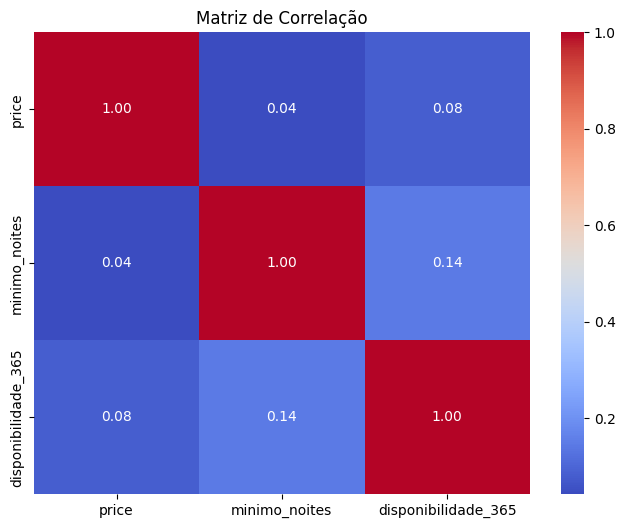

In [ ]:
# Matriz de correla√ß√£o
correlation_matrix = dados[['price', 'minimo_noites', 'disponibilidade_365']].corr()

# Plotar o heatmap da matriz de correla√ß√£o
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correla√ß√£o")
plt.show()


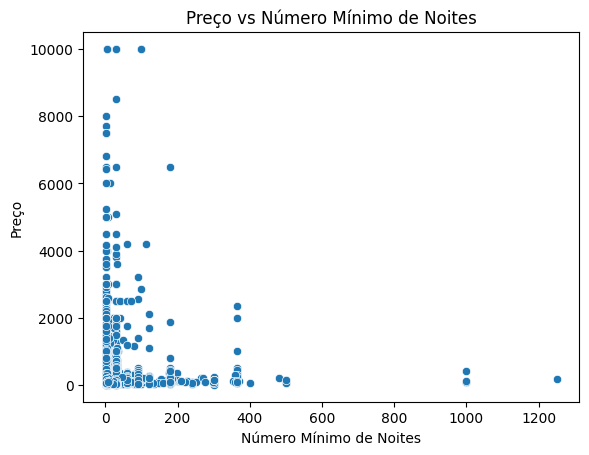

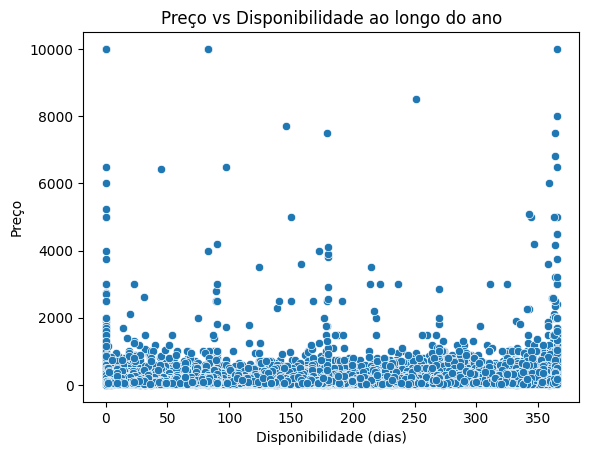

In [ ]:
# Scatterplot: Pre√ßo vs N√∫mero m√≠nimo de noites
sns.scatterplot(x='minimo_noites', y='price', data=dados)
plt.title("Pre√ßo vs N√∫mero M√≠nimo de Noites")
plt.xlabel("N√∫mero M√≠nimo de Noites")
plt.ylabel("Pre√ßo")
plt.show()

# Scatterplot: Pre√ßo vs Disponibilidade
sns.scatterplot(x='disponibilidade_365', y='price', data=dados)
plt.title("Pre√ßo vs Disponibilidade ao longo do ano")
plt.xlabel("Disponibilidade (dias)")
plt.ylabel("Pre√ßo")
plt.show()

**Responda tamb√©m √†s seguintes perguntas:**

**C) Existe algum padr√£o no texto do nome do local para lugares de mais alto valor?**

**Resposta:**

Com base nas palavras mais comuns destacadas na nuvem de palavras e nas contagens fornecidas, podemos concluir:

Padr√µes observados:
Refer√™ncias a luxo e exclusividade:

Palavras como "luxury", "spacious", "private", e "loft" indicam que an√∫ncios de alto valor frequentemente utilizam termos associados a conforto e sofistica√ß√£o.
Localiza√ß√µes privilegiadas:

Termos como "manhattan", "village", "brooklyn", "central", e "park" sugerem que a localiza√ß√£o desempenha um papel importante para an√∫ncios de maior valor. Estes locais s√£o bem conhecidos e provavelmente t√™m alta demanda.
Foco na funcionalidade e tamanho:

Palavras como "bedroom", "apartment", "apt", e "bath" mostram uma √™nfase em descrever o tipo e a funcionalidade do espa√ßo.
Apelos ao design moderno e conveni√™ncia:

Palavras como "modern" e "duplex" sugerem que an√∫ncios de alto valor frequentemente destacam caracter√≠sticas arquitet√¥nicas modernas.
Implica√ß√£o:
Os nomes dos an√∫ncios n√£o apenas descrevem o im√≥vel, mas tamb√©m fazem uso estrat√©gico de palavras-chave que evocam luxo, conveni√™ncia e localiza√ß√£o privilegiada, fatores que atraem clientes dispostos a pagar pre√ßos mais altos.

Em suma:

Sim, existe um padr√£o no texto do nome do local para lugares de mais alto valor. Os an√∫ncios de maior valor costumam destacar aspectos como luxo, exclusividade e localiza√ß√£o privilegiada. Palavras como "luxury", "spacious", "private" e "loft" s√£o frequentemente usadas para transmitir sofistica√ß√£o e conforto. Al√©m disso, termos que remetem a √°reas de alta demanda, como "manhattan", "village", "central", e "park", aparecem com frequ√™ncia, refor√ßando a valoriza√ß√£o da localiza√ß√£o. Tamb√©m √© comum o uso de descri√ß√µes funcionais, como "bedroom", "apartment", e "bath", que ajudam a descrever o im√≥vel de maneira objetiva e atrativa. Esses padr√µes sugerem que os anfitri√µes utilizam palavras estrat√©gicas para atrair clientes dispostos a pagar pre√ßos mais altos.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Palavras mais comuns nos locais de alto valor:
br: 749
bedroom: 722
apartment: 554
apt: 499
luxury: 470
loft: 449
village: 374
manhattan: 356
park: 352
w: 349
spacious: 308
east: 302
nyc: 297
west: 284
midtown: 275
bed: 271
central: 268
private: 259
bath: 249
brooklyn: 246


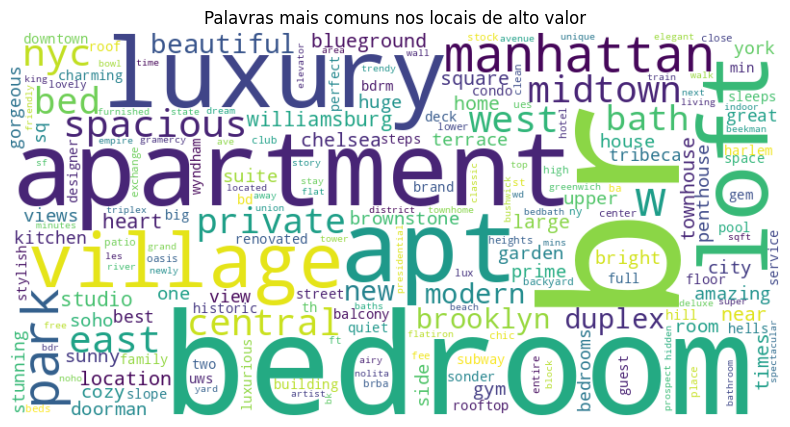

In [ ]:
nltk.download('stopwords')

# Definir stopwords (palavras irrelevantes) em ingl√™s
stop_words = set(stopwords.words('english'))

# Filtrar os locais de alto valor (top 10% mais caros)
top_10_percent = dados[dados['price'] >= dados['price'].quantile(0.9)]

# Obter os nomes dos locais
high_value_names = top_10_percent['nome'].dropna()

# Pr√©-processamento dos nomes
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove pontua√ß√µes
    text = re.sub(r'\d+', '', text)      # Remove n√∫meros
    tokens = text.lower().split()       # Tokeniza e converte para min√∫sculas
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Aplicar o pr√©-processamento
all_words = high_value_names.apply(preprocess_text).explode()

# Contar palavras mais comuns
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)  # Top 20 palavras

# Exibir as palavras mais comuns
print("Palavras mais comuns nos locais de alto valor:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Criar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Palavras mais comuns nos locais de alto valor")
plt.show()


3) Explique como voc√™ faria a previs√£o do pre√ßo a partir dos dados. Quais vari√°veis e/ou suas transforma√ß√µes voc√™ utilizou e por qu√™? Qual tipo de problema estamos resolvendo (regress√£o, classifica√ß√£o)? Qual modelo melhor se aproxima dos dados e quais seus pr√≥s e contras? Qual medida de performance do modelo foi escolhida e por qu√™?



Resposta:

A previs√£o do pre√ßo dos im√≥veis foi realizada a partir de um conjunto de dados contendo caracter√≠sticas relevantes dos apartamentos. Para isso, seguimos um pipeline de pr√©-processamento e modelagem, garantindo que os dados fossem devidamente preparados antes do treinamento do modelo.

1. Como a previs√£o foi feita?
A previs√£o do pre√ßo dos apartamentos foi feita utilizando um modelo de Regress√£o Linear, que se mostrou o mais adequado dentre os testados. O pipeline seguiu os seguintes passos:

Remo√ß√£o de colunas irrelevantes

Exclu√≠mos id, nome, host_name e host_id, pois s√£o apenas identificadores e n√£o influenciam no pre√ßo.
Tamb√©m removemos ultima_review, pois n√£o tem impacto direto no valor do im√≥vel.
Tratamento de vari√°veis categ√≥ricas

Aplicamos One-Hot Encoding nas vari√°veis bairro_group, bairro e room_type para convert√™-las em vari√°veis num√©ricas.
Isso permitiu que os modelos interpretassem corretamente essas caracter√≠sticas sem criar uma rela√ß√£o ordinal artificial entre os valores.
Tratamento de valores ausentes

Preenchemos os valores ausentes com zero, garantindo que os dados estivessem completos antes do treinamento.
Sele√ß√£o de Features

Testamos um conjunto menor de vari√°veis (longitude, latitude, disponibilidade_365, bairro_group, bairro, room_type e minimo_noites).
No entanto, a performance dos modelos n√£o foi satisfat√≥ria.
O melhor desempenho foi obtido ao utilizar todas as colunas do dataset, exceto price (a vari√°vel alvo) e ultima_review.
Divis√£o dos Dados

Dividimos os dados em treino (80%) e teste (20%) para avaliar o modelo de forma justa.
Treinamento e Avalia√ß√£o dos Modelos

Testamos m√∫ltiplos modelos:
Regress√£o Linear
Random Forest
XGBoost
CatBoost
√Årvore de Decis√£o
Rede Neural
O modelo de Regress√£o Linear apresentou o melhor equil√≠brio entre interpretabilidade e desempenho, sendo escolhido como modelo final.

2. Tipo de Problema

Esse √© um problema de regress√£o, pois queremos prever um valor cont√≠nuo (pre√ßo do aluguel). Modelos de regress√£o s√£o apropriados para esse tipo de tarefa, pois aprendem a rela√ß√£o entre vari√°veis independentes (features) e a vari√°vel dependente (price).

3. Melhor Modelo e Justificativa

O modelo Regress√£o Linear foi o escolhido, pois apresentou os melhores resultados em termos de simplicidade e desempenho. Algumas vantagens e desvantagens desse modelo s√£o:

Pr√≥s:

F√°cil de interpretar.
R√°pido para treinar e prever.
Funciona bem quando h√° rela√ß√µes lineares entre as vari√°veis.

Contras:

Sens√≠vel a outliers, que podem distorcer os coeficientes.
N√£o captura rela√ß√µes n√£o lineares entre as vari√°veis.
Pode sofrer com multicolinearidade (correla√ß√£o alta entre features).
Mesmo com essas limita√ß√µes, a Regress√£o Linear teve o melhor equil√≠brio entre erro e interpretabilidade.

In [20]:
df = dados.copy()

Remover colunas

In [21]:
df.drop(columns=["id", "nome", "host_name"], inplace=True)

In [22]:
# Criar Target Encoding para host_id
df["host_price_mean"] = df.groupby("host_id")["price"].transform("mean")

In [23]:
# Substituir host_id pelo n√∫mero de an√∫ncios do host
df.drop(columns=["host_id"], inplace=True)

In [24]:
# Vari√°veis categ√≥ricas -> One-Hot Encoding
categorical_cols = ["bairro_group", "bairro", "room_type"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [25]:
# Tratar valores ausentes
df.fillna(0, inplace=True)

In [26]:
# Separar features e target
X = df.drop(columns=["price"])
y = df["price"]

In [27]:
# Removendo a coluna ultima_review
X = X.drop(columns=['ultima_review'])

In [28]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
import xgboost

In [29]:
# Criar e treinar modelos
models = {
    "Regress√£o Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    #"XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    "XGBoost":XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

}

In [30]:
# Criar uma c√≥pia do conjunto de teste para armazenar as previs√µes
df_predictions = X_test.copy()
df_predictions["price_real"] = y_test  # Adicionando a coluna com os pre√ßos reais

# Avaliar modelos e armazenar previs√µes
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Treinamento do modelo
    y_pred = model.predict(X_test)  # Fazer previs√µes

    # Calcular m√©tricas de erro
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Armazenar as previs√µes no dataset
    col_name = f"Pred_{name.replace(' ', '_')}"  # Ex: "Pred_Linear_Regression"
    df_predictions[col_name] = y_pred

    # Guardar os resultados das m√©tricas
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R¬≤": r2}

    # Exibir m√©tricas do modelo
    print(f"{name}:")
    print(f"   MSE  = {mse:.2f}")
    print(f"   RMSE = {rmse:.2f}")
    print(f"   MAE  = {mae:.2f}")
    print(f"   R¬≤   = {r2:.4f}")
    print("-" * 40)

Regress√£o Linear:
   MSE  = 2235.09
   RMSE = 47.28
   MAE  = 14.53
   R¬≤   = 0.9552
----------------------------------------
Random Forest:
   MSE  = 2547.09
   RMSE = 50.47
   MAE  = 11.53
   R¬≤   = 0.9490
----------------------------------------
XGBoost:
   MSE  = 13601.01
   RMSE = 116.62
   MAE  = 17.62
   R¬≤   = 0.7275
----------------------------------------


In [35]:
# Exibir as primeiras linhas do dataset atualizado
df_predictions[['price_real', 'Pred_Regress√£o_Linear', 'Pred_Random_Forest', 'Pred_XGBoost']].head(30)

price_real  Pred_Regress√£o_Linear  Pred_Random_Forest  Pred_XGBoost
879           110             107.371928              110.00    111.949440
47429          40              36.972474               37.49     38.012405
15394          57              71.232071               71.39     62.472088
24100         375             380.024513              377.97    349.632935
16332         195             187.165758              193.46    192.214920
5966          120             105.418001              108.55    104.314568
34363          89             128.886218              149.39    139.735916
41763          60              64.400601               60.00     53.873951
11118         120             121.145657              120.00    118.520462
22878         120             127.108534              120.00    119.788979
42214          28              23.612578               29.52     35.691750
31729          89              98.847904              104.89    103.406723
5990          180             177.425212              180.00    182.891037
13153         169             279.093762              188.75    170.447983
28159          51              64.642873               50.77     50.204842
19825          38              33.967337               38.39     39.639168
24470         115             109.207361              115.00    112.052261
36518          70              68.231978               70.98     74.587059
36266         314             302.627218              288.07    272.970459
3290          149             157.277974              149.00    149.496017
41957          40              37.938693               39.60     41.677128
5522           65              60.179272               64.94     64.237473
2757          100              96.018866              113.63    115.212120
708           101              93.071953              100.63    106.086273
11972          99              81.160329               99.00     99.229614
29846          47              42.118550               47.78     46.843121
23272          49              46.038976               48.65     49.055099
13963          90              79.663744               90.00     90.385727
7029          249             254.372214              249.00    252.026611
48322         125             129.502465              125.00    125.655037

In [46]:
df2 = dados.copy()

In [43]:
# Remover colunas irrelevantes
cols_to_drop = ['id', 'nome', 'host_name', 'ultima_review']
df2.drop(columns=cols_to_drop, inplace=True)

# Preenchendo valores ausentes
df2.fillna({'reviews_por_mes': 0}, inplace=True)

# Criar vari√°vel que representa o n√∫mero de an√∫ncios do host
df2['host_listings_count'] = df2.groupby('host_id')['host_id'].transform('count')

# Separando vari√°veis num√©ricas e categ√≥ricas
num_features = ['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
                'calculado_host_listings_count', 'disponibilidade_365', 'host_listings_count']
cat_features = ['bairro_group', 'bairro', 'room_type']

# Criando transforma√ß√µes
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Separar dados entre treino e teste
X = df2.drop(columns=['price'])
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar o pr√©-processador ao conjunto de treinamento e teste
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Criar uma c√≥pia do conjunto de teste para armazenar as previs√µes
df_predictions = pd.DataFrame(X_test)  # Convertendo de volta para DataFrame
df_predictions["price_real"] = y_test.values  # Adicionando pre√ßos reais

# Criando modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=7, random_seed=42, verbose=0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
}

In [44]:
# Avaliar modelos e armazenar previs√µes
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Treinamento do modelo
    y_pred = model.predict(X_test)  # Fazer previs√µes

    # Calcular m√©tricas de erro
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Armazenar as previs√µes no dataset
    col_name = f"Pred_{name.replace(' ', '_')}"  # Ex: "Pred_Linear_Regression"
    df_predictions[col_name] = y_pred

    # Guardar os resultados das m√©tricas
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R¬≤": r2}

    # Exibir m√©tricas do modelo
    print(f"{name}:")
    print(f"   MSE  = {mse:.2f}")
    print(f"   RMSE = {rmse:.2f}")
    print(f"   MAE  = {mae:.2f}")
    print(f"   R¬≤   = {r2:.4f}")
    print("-" * 40)

Linear Regression:
   MSE  = 44301.41
   RMSE = 210.48
   MAE  = 68.27
   R¬≤   = 0.1123
----------------------------------------
Random Forest:
   MSE  = 54962.80
   RMSE = 234.44
   MAE  = 66.11
   R¬≤   = -0.1013
----------------------------------------
CatBoost:
   MSE  = 47943.51
   RMSE = 218.96
   MAE  = 63.38
   R¬≤   = 0.0393
----------------------------------------
Decision Tree:
   MSE  = 125798.93
   RMSE = 354.68
   MAE  = 89.88
   R¬≤   = -1.5207
----------------------------------------
Polynomial Regression:
   MSE  = 437771.66
   RMSE = 661.64
   MAE  = 90.43
   R¬≤   = -7.7719
----------------------------------------
Neural Network:
   MSE  = 49325.62
   RMSE = 222.09
   MAE  = 79.71
   R¬≤   = 0.0116
----------------------------------------


In [47]:
# Exibir as primeiras linhas do dataset atualizado com as previs√µes
df_predictions.head(30)

0  price_real  \
0     (0, 0)\t1.364925512861013\n  (0, 1)\t-0.0158...         110   
1     (0, 0)\t-1.5326651550402164\n  (0, 1)\t0.037...          40   
2     (0, 0)\t-1.3780829246421193\n  (0, 1)\t-0.18...          57   
3     (0, 0)\t-0.6585962727062069\n  (0, 1)\t-0.63...         375   
4     (0, 0)\t-2.455385214399799\n  (0, 1)\t3.9293...         195   
5     (0, 0)\t-0.10709387351876809\n  (0, 1)\t-0.6...         120   
6     (0, 0)\t-0.8366779395543917\n  (0, 1)\t1.479...          89   
7     (0, 0)\t0.7168551170115945\n  (0, 1)\t2.3311...          60   
8     (0, 0)\t-0.7997764807539275\n  (0, 1)\t-0.01...         120   
9     (0, 0)\t-0.5445872880538881\n  (0, 1)\t0.930...         120   
10    (0, 0)\t-0.9620694637371708\n  (0, 1)\t0.870...          28   
11    (0, 0)\t-0.8170338793969424\n  (0, 1)\t-0.34...          89   
12    (0, 0)\t-0.173736806576393\n  (0, 1)\t-0.725...         180   
13    (0, 0)\t-0.3964306848101884\n  (0, 1)\t-1.34...         169   
14    (0, 0)\t-2.3197126867701146\n  (0, 1)\t4.309...          51   
15    (0, 0)\t-1.4961308749342705\n  (0, 1)\t-0.99...          38   
16    (0, 0)\t-0.5693718499348553\n  (0, 1)\t0.411...         115   
17    (0, 0)\t0.4770874294821087\n  (0, 1)\t0.7444...          70   
18    (0, 0)\t-0.11682410892383058\n  (0, 1)\t-0.6...         314   
19    (0, 0)\t0.7284212458893793\n  (0, 1)\t-0.161...         149   
20    (0, 0)\t2.312613723448757\n  (0, 1)\t1.30760...          40   
21    (0, 0)\t0.6215722457804945\n  (0, 1)\t0.8047...          65   
22    (0, 0)\t1.6918981403420648\n  (0, 1)\t0.0576...         100   
23    (0, 0)\t-0.43792187729232773\n  (0, 1)\t-1.3...         101   
24    (0, 0)\t-1.036423149379942\n  (0, 1)\t-0.261...          99   
25    (0, 0)\t0.585405144369067\n  (0, 1)\t0.66398...          47   
26    (0, 0)\t2.225592372844646\n  (0, 1)\t0.29128...          49   
27    (0, 0)\t-1.143455738836021\n  (0, 1)\t-0.539...          90   
28    (0, 0)\t0.5993579347612862\n  (0, 1)\t-0.206...         249   
29    (0, 0)\t-1.7694954130135554\n  (0, 1)\t-1.72...         125   

    Pred_Linear_Regression  Pred_Random_Forest  Pred_CatBoost  \
0               111.650565               87.92      95.575266   
1                85.765628               63.40      81.739828   
2               103.452659               65.98      76.590079   
3               192.788811              228.56     209.068501   
4                -9.640394               80.91      59.366612   
5               111.837443               99.44      70.473860   
6               207.049611              147.20     155.600739   
7               148.317317              128.07     157.861831   
8               161.597555              161.83     136.940019   
9               131.242143              136.83     124.848216   
10                5.352312               29.45      34.590541   
11              178.913267              268.27     135.435814   
12              209.302437              194.24     224.717292   
13              290.787217              173.74     129.229368   
14              235.062906              205.47     123.891907   
15               54.742464               52.81      30.446845   
16               32.502433               59.48      52.832858   
17              119.245497               70.83     101.988940   
18              225.881608              277.57     270.629356   
19              209.591684              219.59     215.251282   
20               26.339362               62.15      41.758516   
21               49.049009               81.72      62.243298   
22              152.889104              272.71     201.580983   
23              198.011278              160.39      94.985110   
24              116.615674               79.95      76.349152   
25               58.830049               72.71      60.337607   
26               57.115725               88.62      66.252588   
27               91.906861               93.66      94.017546   
28              218.936573 

Modelo com remo√ß√£o de outliers

In [57]:
df = dados.copy()

In [58]:
# Fun√ß√£o para remover outliers por bairro
def remove_outliers_by_bairro(df):
    bairros = df["bairro"].unique()
    df_filtered = df.copy()

    for bairro in bairros:
        bairro_data = df_filtered[df_filtered["bairro"] == bairro]
        Q1 = bairro_data["price"].quantile(0.25)
        Q3 = bairro_data["price"].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_filtered = df_filtered[(df_filtered["bairro"] != bairro) | ((df_filtered["price"] >= lower_bound) & (df_filtered["price"] <= upper_bound))]

    return df_filtered

# Remover colunas irrelevantes e preencher valores ausentes
df = dados.copy()  # Supondo que 'dados' seja o DataFrame original

# Remover colunas irrelevantes
cols_to_drop = ['id', 'nome', 'host_name', 'ultima_review']
df.drop(columns=cols_to_drop, inplace=True)

# Preenchendo valores ausentes
df.fillna({'reviews_por_mes': 0}, inplace=True)

# Criar Target Encoding para 'host_id'
df["host_price_mean"] = df.groupby("host_id")["price"].transform("mean")

# Substituir 'host_id' pelo n√∫mero de an√∫ncios do host
df["host_listings_count"] = df.groupby('host_id')['host_id'].transform('count')

# Remover coluna 'host_id'
df.drop(columns=["host_id"], inplace=True)

# Remover outliers
df_filtered = remove_outliers_by_bairro(df)

# Atualizar X e y ap√≥s remover os outliers
X_filtered = df_filtered.drop(columns=["price"])
y_filtered = df_filtered["price"]

# Separar dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

#  Criar transformadores para vari√°veis num√©ricas e categ√≥ricas
num_features = ['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
                'calculado_host_listings_count', 'disponibilidade_365', 'host_listings_count']
cat_features = ['bairro_group', 'bairro', 'room_type']

# Criar transforma√ß√µes
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Criar preprocessor
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Criar modelos
models = {
    "Linear Regression": make_pipeline(preprocessor, LinearRegression()),
    "Random Forest": make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42)),
    "CatBoost": make_pipeline(preprocessor, CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=7, random_seed=42, verbose=0)),
    "Decision Tree": make_pipeline(preprocessor, DecisionTreeRegressor(random_state=42)),
    "Polynomial Regression": make_pipeline(preprocessor, PolynomialFeatures(degree=3), LinearRegression()),
    "Neural Network": make_pipeline(preprocessor, MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42))
}

#  Criar DataFrame para armazenar previs√µes
df_predictions = pd.DataFrame(index=X_test.index)  # Usar o √≠ndice de X_test
df_predictions["price_real"] = y_test.values  # Adicionando pre√ßos reais

# Avaliar modelos e armazenar previs√µes
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Treinamento do modelo
    y_pred = model.predict(X_test)  # Fazer previs√µes

    #  Calcular m√©tricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    #  Adicionar previs√µes ao dataset
    df_predictions[f"Pred_{name.replace(' ', '_')}"] = y_pred

    #  Armazenar resultados das m√©tricas
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R¬≤": r2}

    #  Exibir m√©tricas
    print(f"{name}:")
    print(f"   MSE  = {mse:.2f}")
    print(f"   RMSE = {rmse:.2f}")
    print(f"   MAE  = {mae:.2f}")
    print(f"   R¬≤   = {r2:.4f}")
    print("-" * 40)

Linear Regression:
   MSE  = 2899.22
   RMSE = 53.84
   MAE  = 36.61
   R¬≤   = 0.5306
----------------------------------------
Random Forest:
   MSE  = 2406.71
   RMSE = 49.06
   MAE  = 32.56
   R¬≤   = 0.6104
----------------------------------------
CatBoost:
   MSE  = 2345.24
   RMSE = 48.43
   MAE  = 32.39
   R¬≤   = 0.6203
----------------------------------------
Decision Tree:
   MSE  = 4676.21
   RMSE = 68.38
   MAE  = 44.50
   R¬≤   = 0.2430
----------------------------------------
Polynomial Regression:
   MSE  = 9349.19
   RMSE = 96.69
   MAE  = 36.35
   R¬≤   = -0.5135
----------------------------------------
Neural Network:
   MSE  = 2631.57
   RMSE = 51.30
   MAE  = 34.61
   R¬≤   = 0.5740
----------------------------------------


In [60]:
# Exibir as primeiras linhas do dataset atualizado com previs√µes
df_predictions.head(30)

price_real  Pred_Linear_Regression  Pred_Random_Forest  Pred_CatBoost  \
47178         100               96.690590              123.85     137.459343   
19643         155              237.989372              214.20     213.933353   
33562          99              111.883729               94.50      96.984603   
35192          50               33.875540               47.97      49.652591   
9337           97              122.448797              143.18     121.938087   
17842         150              152.874976              114.22     139.077226   
38478          50               51.398799               89.85      81.167011   
33219          60               88.639985               75.73      86.711529   
3049           75               80.854460               68.55      69.788312   
5014          120              118.648861              117.56     105.751452   
33685         135              119.759952               94.05     111.252776   
19015          40               55.146182               53.66      68.127839   
29888          74               56.126338               58.22      66.780790   
17489         200              186.199470              160.31     194.787598   
37337          70               92.677410               74.53      79.707600   
2624          180              224.830955              274.74     244.377632   
27339          31               46.554957               46.90      48.184905   
24960          50               53.355587              108.85      63.841963   
38093         200               79.858504               62.02      67.410164   
47943          50               47.490998               58.00      54.196288   
11999          95               65.491718               63.11      69.480040   
17078         199              215.188899              203.14     197.552373   
43791         105              141.436369              145.92     144.138830   
17461          60               89.962657               97.50      88.251339   
5897           37               63.918218               47.71      53.994657   
45224         175              182.701830              236.51     191.740403   
6989           72              125.304276               83.98     105.544902   
20198         199              202.250673              178.34     202.877044   
27388          90              108.398040               97.90     100.190526   
48661          66               60.187043               63.98      71.545067   

       Pred_Decision_Tree  Pred_Polynomial_Regression  Pred_Neural_Network  
47178               170.0                  119.616183           128.791852  
19643               160.0                  225.376778           244.875049  
33562                90.0                   90.750107            97.116786  
35192                35.0                   42.113767            52.155129  
9337                189.0                  126.257219           128.092618  
17842                80.0                  143.932408           142.286296  
38478                99.0                   75.326216            80.515442  
33219                60.0                   94.480906           110.664129  
3049                 40.0                   96.670238             0.036093  
5014                160.0                   98.717814            95.385478  
33685                89.0                  112.197880           104.637760  
19015                30.0                   48.419819            44.957411  
29888                70.0                   62.811916            63.866051  
17489               155.0                  203.875912           178.480603  
37337                78.0                   77.315283            70.207575  
2624                240.0                  244.321795           248.739974  
27339                40.0                   57.587727            49.275441  
24960                50.0                   58.189829            59.505392  
38093                70.0                   72.746719          

Testando v√°rios modelos

In [4]:
df = dados.copy()

In [5]:
# Remover colunas irrelevantes
df.drop(columns=["id", "nome", "host_name"], inplace=True)

# Criar Target Encoding para host_id
df["host_price_mean"] = df.groupby("host_id")["price"].transform("mean")

# Substituir host_id pelo n√∫mero de an√∫ncios do host
df.drop(columns=["host_id"], inplace=True)

# Vari√°veis categ√≥ricas -> One-Hot Encoding
categorical_cols = ["bairro_group", "bairro", "room_type"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Tratar valores ausentes
df.fillna(0, inplace=True)

# Separar features e target
X = df.drop(columns=["price"])
y = df["price"]

# Removendo a coluna ultima_review
X = X.drop(columns=['ultima_review'])

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar modelos
models = {
    "Regress√£o Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost":XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8),
    "CatBoost": CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=7, random_seed=42, verbose=0),
    "√Årvore de Decis√£o": DecisionTreeRegressor(random_state=42),
    "Rede Neural": MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
}

# Criar uma c√≥pia do conjunto de teste para armazenar as previs√µes
df_predictions = X_test.copy()
df_predictions["price_real"] = y_test  # Adicionando a coluna com os pre√ßos reais

# Avaliar modelos e armazenar previs√µes
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Treinamento do modelo
    y_pred = model.predict(X_test)  # Fazer previs√µes

    # Calcular m√©tricas de erro
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Armazenar as previs√µes no dataset
    col_name = f"Pred_{name.replace(' ', '_')}"  # Ex: "Pred_Linear_Regression"
    df_predictions[col_name] = y_pred

    # Guardar os resultados das m√©tricas
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R¬≤": r2}

    # Exibir m√©tricas do modelo
    print(f"{name}:")
    print(f"   MSE  = {mse:.2f}")
    print(f"   RMSE = {rmse:.2f}")
    print(f"   MAE  = {mae:.2f}")
    print(f"   R¬≤   = {r2:.4f}")
    print("-" * 40)

Regress√£o Linear:
   MSE  = 2235.09
   RMSE = 47.28
   MAE  = 14.53
   R¬≤   = 0.9552
----------------------------------------
Random Forest:
   MSE  = 2547.09
   RMSE = 50.47
   MAE  = 11.53
   R¬≤   = 0.9490
----------------------------------------
XGBoost:
   MSE  = 13601.01
   RMSE = 116.62
   MAE  = 17.62
   R¬≤   = 0.7275
----------------------------------------
CatBoost:
   MSE  = 5337.49
   RMSE = 73.06
   MAE  = 13.93
   R¬≤   = 0.8930
----------------------------------------
√Årvore de Decis√£o:
   MSE  = 5282.90
   RMSE = 72.68
   MAE  = 14.20
   R¬≤   = 0.8941
----------------------------------------
Rede Neural:
   MSE  = 2336.58
   RMSE = 48.34
   MAE  = 15.88
   R¬≤   = 0.9532
----------------------------------------


In [9]:
# Exibir as primeiras 30 linhas do dataset atualizado
df_predictions[['price_real', 'Pred_Regress√£o_Linear', 'Pred_Random_Forest', 'Pred_XGBoost', 'Pred_CatBoost', 'Pred_√Årvore_de_Decis√£o', 'Pred_Rede_Neural']].head(30)

price_real  Pred_Regress√£o_Linear  Pred_Random_Forest  Pred_XGBoost  \
879           110             107.371928              110.00    111.949440   
47429          40              36.972474               37.49     38.012405   
15394          57              71.232071               71.39     62.472088   
24100         375             380.024513              377.97    349.632935   
16332         195             187.165758              193.46    192.214920   
5966          120             105.418001              108.55    104.314568   
34363          89             128.886218              149.39    139.735916   
41763          60              64.400601               60.00     53.873951   
11118         120             121.145657              120.00    118.520462   
22878         120             127.108534              120.00    119.788979   
42214          28              23.612578               29.52     35.691750   
31729          89              98.847904              104.89    103.406723   
5990          180             177.425212              180.00    182.891037   
13153         169             279.093762              188.75    170.447983   
28159          51              64.642873               50.77     50.204842   
19825          38              33.967337               38.39     39.639168   
24470         115             109.207361              115.00    112.052261   
36518          70              68.231978               70.98     74.587059   
36266         314             302.627218              288.07    272.970459   
3290          149             157.277974              149.00    149.496017   
41957          40              37.938693               39.60     41.677128   
5522           65              60.179272               64.94     64.237473   
2757          100              96.018866              113.63    115.212120   
708           101              93.071953              100.63    106.086273   
11972          99              81.160329               99.00     99.229614   
29846          47              42.118550               47.78     46.843121   
23272          49              46.038976               48.65     49.055099   
13963          90              79.663744               90.00     90.385727   
7029          249             254.372214              249.00    252.026611   
48322         125             129.502465              125.00    125.655037   

       Pred_CatBoost  Pred_√Årvore_de_Decis√£o  Pred_Rede_Neural  
879       107.883848                   110.0        107.551846  
47429      40.852869                    42.0         42.656690  
15394      68.147109                    80.0         76.193877  
24100     369.835008                   375.0        377.952166  
16332     198.190695                   195.0        177.249637  
5966      103.013844                   105.0        101.132254  
34363     131.578529                   150.0        130.735354  
41763      57.620915                    60.0         71.266459  
11118     121.569976                   120.0        124.084216  
22878     120.177437                   120.0        123.215343  
42214      37.709394                    27.0         32.752204  
31729      91.096084                   120.0        116.625645  
5990      181.753171                   180.0        184.875073  
13153     228.669724                   169.0        284.702515  
28159      51.333278                    51.0         62.216551  
19825      38.232539                    38.0         41.350577  
24470     111.343959                   115.0        106.288773  
36518      70.538714                    70.0         74.659297  
36266     306.456797                   312.0        305.125239  
3290      142.616368                   149.0        155.688569  
41957      42.130269                    40.0         43.886632  
5522       64.695844                    65.0         64.646342  
2757      111.578709                   100.0        106.638023  
708       107.215908     

In [37]:
df = dados.copy()

In [27]:
#  Carregar os dados (supondo que df j√° est√° carregado)
#  Remover colunas irrelevantes
df.drop(columns=["id", "nome", "host_name", "host_id"], inplace=True)  # Removendo tamb√©m host_id

#  One-Hot Encoding para vari√°veis categ√≥ricas
categorical_cols = ["bairro_group", "bairro", "room_type"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#  Tratar valores ausentes
df.fillna(0, inplace=True)

#  Separar features e target
X = df.drop(columns=["price", "ultima_review"])  # Removendo 'ultima_review'
y = df["price"]

#  Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Criar e treinar modelos
models = {
    "Regress√£o Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8),
    "CatBoost": CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=7, random_seed=42, verbose=0),
    "√Årvore de Decis√£o": DecisionTreeRegressor(random_state=42),
    "Rede Neural": MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
}

#  Criar DataFrame para armazenar previs√µes
df_predictions = X_test.copy()
df_predictions["price_real"] = y_test  # Adicionando a coluna com os pre√ßos reais

#  Avaliar modelos e armazenar previs√µes
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Treinar modelo
    y_pred = model.predict(X_test)  # Fazer previs√µes

    # Calcular m√©tricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Armazenar previs√µes
    col_name = f"Pred_{name.replace(' ', '_')}"  # Ex: "Pred_Linear_Regression"
    df_predictions[col_name] = y_pred

    # Guardar m√©tricas
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R¬≤": r2}

    # Exibir m√©tricas
    print(f"{name}:")
    print(f"   MSE  = {mse:.2f}")
    print(f"   RMSE = {rmse:.2f}")
    print(f"   MAE  = {mae:.2f}")
    print(f"   R¬≤   = {r2:.4f}")
    print("-" * 40)



Regress√£o Linear:
   MSE  = 44301.27
   RMSE = 210.48
   MAE  = 68.27
   R¬≤   = 0.1123
----------------------------------------
Random Forest:
   MSE  = 54526.84
   RMSE = 233.51
   MAE  = 66.57
   R¬≤   = -0.0926
----------------------------------------
XGBoost:
   MSE  = 61535.41
   RMSE = 248.06
   MAE  = 72.38
   R¬≤   = -0.2330
----------------------------------------
CatBoost:
   MSE  = 47721.84
   RMSE = 218.45
   MAE  = 63.10
   R¬≤   = 0.0438
----------------------------------------
√Årvore de Decis√£o:
   MSE  = 128365.72
   RMSE = 358.28
   MAE  = 89.95
   R¬≤   = -1.5721
----------------------------------------
Rede Neural:
   MSE  = 45600.01
   RMSE = 213.54
   MAE  = 60.74
   R¬≤   = 0.0863
----------------------------------------


In [28]:
#  Converter resultados em DataFrame para an√°lise
df_results = pd.DataFrame(results).T
print(df_results.sort_values(by="RMSE"))


                             MSE        RMSE        MAE        R¬≤
Regress√£o Linear    44301.265340  210.478658  68.267940  0.112307
Rede Neural         45600.014683  213.541599  60.744626  0.086283
CatBoost            47721.836296  218.453282  63.100016  0.043767
Random Forest       54526.841338  233.509831  66.570527 -0.092589
XGBoost             61535.406250  248.063311  72.384438 -0.233024
√Årvore de Decis√£o  128365.720421  358.281622  89.950711 -1.572146


In [29]:
# Exibir as primeiras 30 linhas do dataset atualizado
df_predictions[['price_real', 'Pred_Regress√£o_Linear', 'Pred_Random_Forest', 'Pred_XGBoost', 'Pred_CatBoost', 'Pred_√Årvore_de_Decis√£o', 'Pred_Rede_Neural']].head(30)

price_real  Pred_Regress√£o_Linear  Pred_Random_Forest  Pred_XGBoost  \
879           110             111.653556               90.03     96.774651   
47429          40              85.763967               65.35     34.665123   
15394          57             103.451624               65.20     50.021477   
24100         375             192.812075              238.80    200.602585   
16332         195              -9.520262               85.86     73.093384   
5966          120             111.834910               95.33    156.310104   
34363          89             207.115358              148.90    257.025513   
41763          60             148.490079              115.52     43.855904   
11118         120             161.602993              170.24    171.359695   
22878         120             131.275573              135.35    118.158302   
42214          28               5.340299               29.01     33.998783   
31729          89             178.919415              274.02     59.345451   
5990          180             209.303812              181.87    184.149796   
13153         169             290.788061              180.82    177.035919   
28159          51             234.976965              206.87    112.893776   
19825          38              54.755602               50.62     49.101196   
24470         115              32.507411               60.44     67.451111   
36518          70             119.246986               68.29     64.601822   
36266         314             225.879021              281.20    362.034668   
3290          149             209.595820              203.25    265.743469   
41957          40              26.286977               60.96     76.613876   
5522           65              49.052246               76.26     64.915367   
2757          100             152.892168              269.38    266.917206   
708           101             198.011777              165.43    106.268105   
11972          99             116.621826               80.23     59.271423   
29846          47              58.835134               74.58     61.300022   
23272          49              57.129490               91.48     41.061161   
13963          90              91.913324              106.61    117.632652   
7029          249             218.942796              265.93    232.794983   
48322         125             178.338848              170.75    138.719055   

       Pred_CatBoost  Pred_√Årvore_de_Decis√£o  Pred_Rede_Neural  
879        97.877600                   111.0         65.470141  
47429      84.837385                    35.0        111.444440  
15394      76.740843                    38.0         63.516088  
24100     221.882820                   240.0        210.970895  
16332      63.912236                    45.0         41.964515  
5966       73.569596                    72.0         98.772686  
34363     145.743292                   195.0        153.819060  
41763     345.842434                    69.0         37.867792  
11118     133.926662                   110.0        106.071006  
22878     114.606443                   120.0        101.430950  
42214      27.400562                    35.0         41.472195  
31729      92.508116                   550.0       -381.879546  
5990      218.300269                   261.0        174.721707  
13153     101.566322                   169.0        203.837492  
28159     118.203424                   425.0        153.624497  
19825      38.299646                    60.0         48.266231  
24470      57.973588                    40.0         34.354807  
36518     102.141209                    70.0         95.108719  
36266     290.079155                   450.0        319.994358  
3290      192.385016                   108.0        175.107531  
41957      43.449175                   100.0         46.419449  
5522       60.688648                   100.0         74.665228  
2757      201.602886                   145.0        162.363607  
708       113.807645     

In [79]:
df = dados.copy()

In [80]:
#  Carregar os dados (supondo que df j√° est√° carregado)
#  Remover colunas desnecess√°rias
df.drop(columns=["id", "nome", "host_name", "host_id"], inplace=True)

#  Aplicar One-Hot Encoding para vari√°veis categ√≥ricas
categorical_cols = ["bairro_group", "bairro", "room_type"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#  Tratar valores ausentes
df.fillna(0, inplace=True)

#  Separar features e target
X = df.drop(columns=["price", "ultima_review"])  # Removendo 'ultima_review'
y = df["price"]

#  Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Criar e treinar o modelo de Regress√£o Linear
model = LinearRegression()
model.fit(X_train, y_train)

#  Fazer previs√µes
y_pred = model.predict(X_test)

#  Calcular as m√©tricas de desempenho
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#  Exibir as m√©tricas
print("Modelo Final - Regress√£o Linear:")
print(f"   MSE  = {mse:.2f}")
print(f"   RMSE = {rmse:.2f}")
print(f"   MAE  = {mae:.2f}")
print(f"   R¬≤   = {r2:.4f}")
print("-" * 40)

#  Criar DataFrame para armazenar previs√µes
df_predictions = X_test.copy()
df_predictions["price_real"] = y_test  # Adicionando a coluna com os pre√ßos reais
df_predictions["price_pred"] = y_pred  # Adicionando a coluna com as previs√µes

Modelo Final - Regress√£o Linear:
   MSE  = 44301.27
   RMSE = 210.48
   MAE  = 68.27
   R¬≤   = 0.1123
----------------------------------------


Salvando o arquivo .pkl

In [81]:
import pickle

# Salvar o modelo treinado
with open("modelo_regressao.pkl", "wb") as f:
    pickle.dump(model, f)

In [78]:
#Exibir as primeiras previs√µes
df_predictions[['price_real', 'price_pred']].head(30)

price_real  price_pred
879           110  111.653556
47429          40   85.763967
15394          57  103.451624
24100         375  192.812075
16332         195   -9.520262
5966          120  111.834910
34363          89  207.115358
41763          60  148.490079
11118         120  161.602993
22878         120  131.275573
42214          28    5.340299
31729          89  178.919415
5990          180  209.303812
13153         169  290.788061
28159          51  234.976965
19825          38   54.755602
24470         115   32.507411
36518          70  119.246986
36266         314  225.879021
3290          149  209.595820
41957          40   26.286977
5522           65   49.052246
2757          100  152.892168
708           101  198.011777
11972          99  116.621826
29846          47   58.835134
23272          49   57.129490
13963          90   91.913324
7029          249  218.942796
48322         125  178.338848

In [24]:
# ---------------------------------
#  Previs√£o para um novo apartamento
# ---------------------------------

# Criar DataFrame com os dados do apartamento a ser previsto
apartamento = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

df_apartamento = pd.DataFrame([apartamento])  # Criar DataFrame

# **Aplicar as mesmas transforma√ß√µes do modelo treinado**

#  Remover colunas irrelevantes
df_apartamento.drop(columns=["id", "nome", "host_name", "host_id", "ultima_review"], inplace=True)

#  One-Hot Encoding para vari√°veis categ√≥ricas
df_apartamento = pd.get_dummies(df_apartamento, columns=categorical_cols, drop_first=True)

#  Garantir que as colunas estejam na mesma ordem que no conjunto de treino
df_apartamento = df_apartamento.reindex(columns=X_train.columns, fill_value=0)

#  Fazer a previs√£o com o modelo treinado
preco_estimado = model.predict(df_apartamento)



In [25]:
#  Exibir o pre√ßo estimado
print(f"Pre√ßo estimado para o apartamento: ${preco_estimado[0]:.2f}")


Pre√ßo estimado para o apartamento: $279.52


Sele√ß√£o de vari√°veis

In [30]:
df = dados.copy()

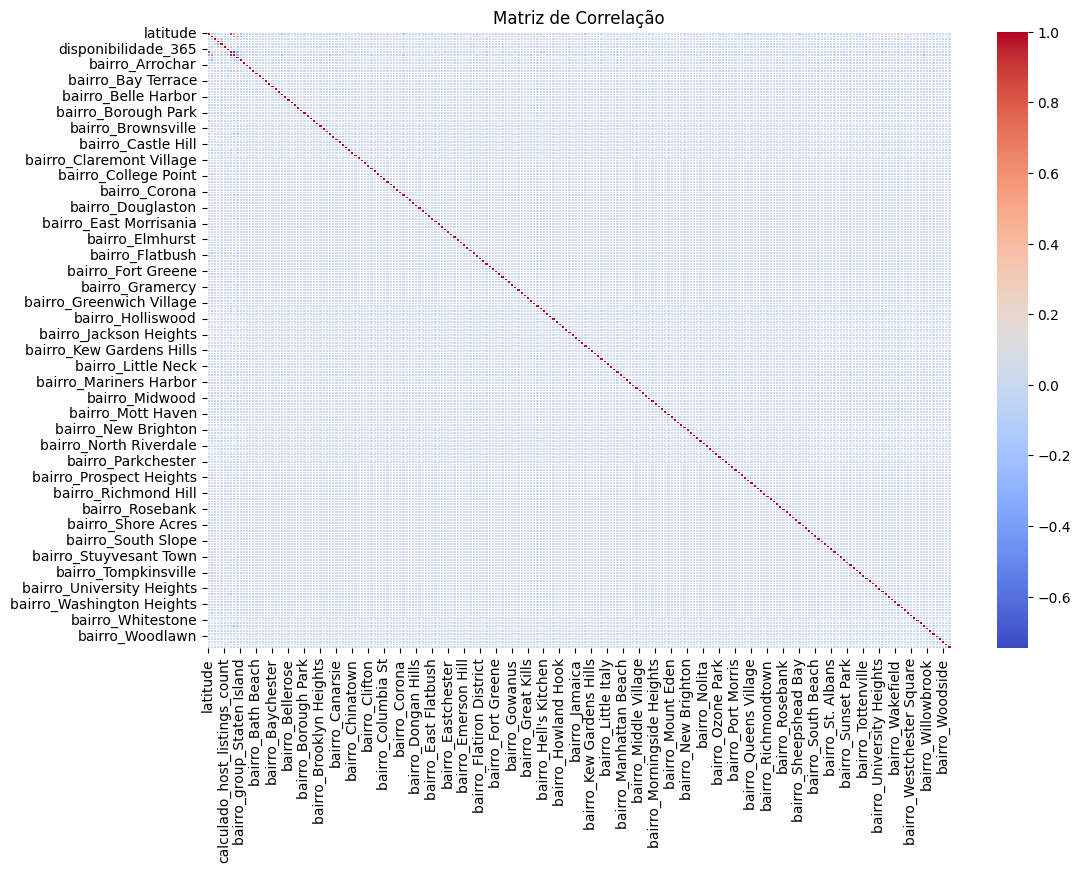


üîπ Import√¢ncia das Features - Random Forest
                           feature    importance
0                         latitude  1.994091e-01
1                        longitude  1.962206e-01
6              disponibilidade_365  1.005099e-01
2                    minimo_noites  8.575380e-02
5    calculado_host_listings_count  6.622202e-02
..                             ...           ...
175            bairro_Richmondtown  2.905724e-09
182               bairro_Rossville  1.379143e-09
151                bairro_New Dorp  0.000000e+00
52               bairro_Co-op City  0.000000e+00
149                bairro_Neponsit  0.000000e+00

[233 rows x 2 columns]

üîπ Coeficientes da Regress√£o Linear
                   feature   coefficient
1                longitude -8.287002e+02
92   bairro_Fort Wadsworth  6.237574e+02
184        bairro_Sea Gate  5.365046e+02
229         bairro_Woodrow  4.908143e+02
177       bairro_Riverdale  3.317004e+02
..                     ...           ...
2            

In [31]:
from sklearn.feature_selection import RFE, SelectKBest, f_regression



# Remover colunas irrelevantes
df.drop(columns=["id", "nome", "host_name", "host_id", "ultima_review"], inplace=True)

# Vari√°veis categ√≥ricas -> One-Hot Encoding
categorical_cols = ["bairro_group", "bairro", "room_type"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Tratar valores ausentes
df.fillna(0, inplace=True)

# Separar features e target
X = df.drop(columns=["price"])
y = df["price"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Matriz de Correla√ß√£o
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correla√ß√£o")
plt.show()

### 2. Import√¢ncia das Features - Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame({"feature": X.columns, "importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="importance", ascending=False)
print("\nüîπ Import√¢ncia das Features - Random Forest")
print(feature_importances)

### 3. Import√¢ncia das Features - Regress√£o Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
coefficients = pd.DataFrame({"feature": X.columns, "coefficient": lr.coef_})
coefficients = coefficients.sort_values(by="coefficient", key=abs, ascending=False)
print("\nüîπ Coeficientes da Regress√£o Linear")
print(coefficients)

### 4. Sele√ß√£o de Features com RFE (Recursive Feature Elimination)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features_rfe = X.columns[rfe.support_]
print("\nüîπ Features Selecionadas pelo RFE:")
print(selected_features_rfe)

### 5. Sele√ß√£o de Features com SelectKBest
kbest = SelectKBest(score_func=f_regression, k=10)
kbest.fit(X_train, y_train)
selected_features_kbest = X.columns[kbest.get_support()]
print("\nüîπ Features Selecionadas pelo SelectKBest:")
print(selected_features_kbest)


In [33]:
df = dados.copy()

In [34]:
# üîπ Carregar os dados (supondo que df j√° est√° carregado)
# üîπ Remover colunas irrelevantes
df.drop(columns=["id", "nome", "host_name", "host_id", "ultima_review", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count"], inplace=True)

# üîπ One-Hot Encoding para vari√°veis categ√≥ricas
categorical_cols = ["bairro_group", "bairro", "room_type"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# üîπ Tratar valores ausentes
df.fillna(0, inplace=True)

# üîπ Separar features e target
X = df[["longitude", "latitude", "disponibilidade_365", "minimo_noites"] + [col for col in df.columns if col.startswith("bairro_") or col.startswith("bairro_group_") or col.startswith("room_type_")]]
y = df["price"]

# üîπ Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üîπ Criar e treinar modelos
models = {
    "Regress√£o Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8),
    "CatBoost": CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=7, random_seed=42, verbose=0),
    "√Årvore de Decis√£o": DecisionTreeRegressor(random_state=42),
    "Rede Neural": MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
}

# üîπ Criar DataFrame para armazenar previs√µes
df_predictions = X_test.copy()
df_predictions["price_real"] = y_test  # Adicionando a coluna com os pre√ßos reais

# üîπ Avaliar modelos e armazenar previs√µes
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Treinar modelo
    y_pred = model.predict(X_test)  # Fazer previs√µes

    # Calcular m√©tricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Armazenar previs√µes
    col_name = f"Pred_{name.replace(' ', '_')}"  # Ex: "Pred_Linear_Regression"
    df_predictions[col_name] = y_pred

    # Guardar m√©tricas
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R¬≤": r2}

    # Exibir m√©tricas
    print(f"{name}:")
    print(f"   MSE  = {mse:.2f}")
    print(f"   RMSE = {rmse:.2f}")
    print(f"   MAE  = {mae:.2f}")
    print(f"   R¬≤   = {r2:.4f}")
    print("-" * 40)


Regress√£o Linear:
   MSE  = 44444.60
   RMSE = 210.82
   MAE  = 67.76
   R¬≤   = 0.1094
----------------------------------------
Random Forest:
   MSE  = 53651.53
   RMSE = 231.63
   MAE  = 68.33
   R¬≤   = -0.0751
----------------------------------------
XGBoost:
   MSE  = 58942.73
   RMSE = 242.78
   MAE  = 73.72
   R¬≤   = -0.1811
----------------------------------------
CatBoost:
   MSE  = 51311.94
   RMSE = 226.52
   MAE  = 65.53
   R¬≤   = -0.0282
----------------------------------------
√Årvore de Decis√£o:
   MSE  = 90526.45
   RMSE = 300.88
   MAE  = 85.86
   R¬≤   = -0.8139
----------------------------------------
Rede Neural:
   MSE  = 45043.54
   RMSE = 212.23
   MAE  = 65.63
   R¬≤   = 0.0974
----------------------------------------


In [36]:
# Exibir as primeiras 30 linhas do dataset atualizado
df_predictions[['price_real', 'Pred_Regress√£o_Linear', 'Pred_Random_Forest', 'Pred_XGBoost', 'Pred_CatBoost', 'Pred_√Årvore_de_Decis√£o', 'Pred_Rede_Neural']].head(30)

price_real  Pred_Regress√£o_Linear  Pred_Random_Forest  Pred_XGBoost  \
879           110             109.513928              117.76     99.931503   
47429          40              79.500465               57.49     67.351112   
15394          57              99.443247               65.05     46.334816   
24100         375             189.553859              207.44    213.409973   
16332         195              -8.540055               66.48     46.094234   
5966          120             110.709628               92.41     64.884293   
34363          89             199.720805              137.79    147.165054   
41763          60             136.930093              109.79     84.519768   
11118         120             190.568873              148.08    149.856873   
22878         120             127.124479              142.17    113.693275   
42214          28               6.041089               28.96     52.476925   
31729          89             192.283794              221.98     57.909725   
5990          180             245.238710              249.03    215.784714   
13153         169             283.729914              190.34    169.949631   
28159          51             233.682793              223.20    211.149200   
19825          38              50.037944               47.78     54.615631   
24470         115              52.834999               63.90     62.746120   
36518          70             108.755004               72.08     58.551567   
36266         314             265.735258              282.35    318.987274   
3290          149             204.403010              220.81    675.823975   
41957          40              48.752955               51.77     66.001251   
5522           65              58.666968               62.47     69.236626   
2757          100             211.598112              510.99    485.197937   
708           101             176.360562              182.61    140.534836   
11972          99             110.268473               77.49     56.226513   
29846          47              63.537014               67.80     64.045937   
23272          49              55.338917              101.61     57.311260   
13963          90             100.144262              162.83    150.368256   
7029          249             232.534199              310.02    286.013550   
48322         125             174.025882              134.88    125.897369   

       Pred_CatBoost  Pred_√Årvore_de_Decis√£o  Pred_Rede_Neural  
879       112.818158                   122.0        101.383849  
47429      70.326628                    35.0        124.577509  
15394      83.468129                    38.0         93.043164  
24100     210.317877                   335.0        218.472009  
16332      75.082373                    60.0         50.932880  
5966       69.954473                    95.0         90.173197  
34363     152.855207                   160.0        159.518388  
41763     178.683498                   167.0        124.163609  
11118     133.905539                   132.0        146.349251  
22878     115.454093                   115.0        107.278557  
42214      55.962200                    35.0         67.982240  
31729     106.031612                   220.0        434.607939  
5990      253.006163                   180.0        238.351610  
13153     177.594800                   225.0        219.901571  
28159     123.289842                   450.0        258.046618  
19825      52.583572                    55.0         52.429367  
24470      68.917098                    43.0         55.134556  
36518      85.486754                    80.0        106.145197  
36266     231.165313                   333.0        236.102007  
3290      303.510062                   400.0        201.602640  
41957      58.800745                    60.0         70.129796  
5522       62.129576                    50.0         46.262666  
2757      218.682653                   200.0        247.472282  
708       131.079581     

In [38]:
df = dados.copy()

In [39]:
# üîπ Remover colunas irrelevantes
df.drop(columns=["id", "nome", "host_name", "host_id", "ultima_review", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count"], inplace=True)

# üîπ One-Hot Encoding para vari√°veis categ√≥ricas
categorical_cols = ["bairro_group", "bairro", "room_type"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# üîπ Tratar valores ausentes
df.fillna(0, inplace=True)

# üîπ Separar features e target
X = df[["longitude", "latitude", "disponibilidade_365", "minimo_noites"] + [col for col in df.columns if col.startswith("bairro_") or col.startswith("bairro_group_") or col.startswith("room_type_")]]
y = df["price"]

# üîπ Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üîπ Criar e treinar modelo de Regress√£o Linear
model = LinearRegression()
model.fit(X_train, y_train)

# üîπ Fazer previs√µes
y_pred = model.predict(X_test)

# üîπ Calcular m√©tricas de desempenho
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# üîπ Exibir m√©tricas
print("Modelo Final - Regress√£o Linear:")
print(f"   MSE  = {mse:.2f}")
print(f"   RMSE = {rmse:.2f}")
print(f"   MAE  = {mae:.2f}")
print(f"   R¬≤   = {r2:.4f}")
print("-" * 40)

Modelo Final - Regress√£o Linear:
   MSE  = 44444.60
   RMSE = 210.82
   MAE  = 67.76
   R¬≤   = 0.1094
----------------------------------------


In [40]:
# üîπ Criar DataFrame para armazenar previs√µes
df_predictions = X_test.copy()
df_predictions["price_real"] = y_test  # Adicionando pre√ßos reais
df_predictions["price_pred"] = y_pred  # Adicionando previs√µes

In [45]:
# Exibir as primeiras 30 linhas do dataset atualizado
df_predictions[['price_real', 'price_pred']].head(30)

price_real  price_pred
879           110  109.513928
47429          40   79.500465
15394          57   99.443247
24100         375  189.553859
16332         195   -8.540055
5966          120  110.709628
34363          89  199.720805
41763          60  136.930093
11118         120  190.568873
22878         120  127.124479
42214          28    6.041089
31729          89  192.283794
5990          180  245.238710
13153         169  283.729914
28159          51  233.682793
19825          38   50.037944
24470         115   52.834999
36518          70  108.755004
36266         314  265.735258
3290          149  204.403010
41957          40   48.752955
5522           65   58.666968
2757          100  211.598112
708           101  176.360562
11972          99  110.268473
29846          47   63.537014
23272          49   55.338917
13963          90  100.144262
7029          249  232.534199
48322         125  174.025882

In [48]:
apartamento = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

df_apartamento = pd.DataFrame([apartamento])

In [ ]:
# üîπ Remover colunas irrelevantes (como foi feito no treino)
df_apartamento.drop(columns=["id", "nome", "host_name", "host_id", "ultima_review",
                             "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count"], inplace=True)

# üîπ One-Hot Encoding para vari√°veis categ√≥ricas (como foi feito no treino)
categorical_cols = ["bairro_group", "bairro", "room_type"]
df_apartamento = pd.get_dummies(df_apartamento, columns=categorical_cols, drop_first=True)

# üîπ Garantir que df_apartamento tenha as mesmas colunas de X_train
# Adicionar colunas ausentes com valor 0
for col in X_train.columns:
    if col not in df_apartamento.columns:
        df_apartamento[col] = 0

# üîπ Reordenar colunas para garantir o mesmo formato
df_apartamento = df_apartamento[X_train.columns]

# üîπ Fazer a previs√£o
previsao = model.predict(df_apartamento)[0]


In [50]:
# üîπ Exibir resultado
print(f"Pre√ßo estimado do apartamento: ${previsao:.2f}")


Pre√ßo estimado do apartamento: $267.14


In [51]:
df = dados.copy()

In [52]:
# üîπ Remover colunas irrelevantes
df.drop(columns=["id", "nome", "host_name", "host_id", "ultima_review", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count"], inplace=True)

# üîπ Identificar e remover outliers de pre√ßo dentro de cada bairro
def remove_outliers(df, group_col, target_col):
    Q1 = df.groupby(group_col)[target_col].transform(lambda x: x.quantile(0.25))
    Q3 = df.groupby(group_col)[target_col].transform(lambda x: x.quantile(0.75))
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]

df = remove_outliers(df, group_col="bairro", target_col="price")

# üîπ One-Hot Encoding para vari√°veis categ√≥ricas
categorical_cols = ["bairro_group", "bairro", "room_type"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# üîπ Tratar valores ausentes
df.fillna(0, inplace=True)

# üîπ Separar features e target
X = df[["longitude", "latitude", "disponibilidade_365", "minimo_noites"] + [col for col in df.columns if col.startswith("bairro_") or col.startswith("bairro_group_") or col.startswith("room_type_")]]
y = df["price"]

# üîπ Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üîπ Criar e treinar modelo de Regress√£o Linear
model = LinearRegression()
model.fit(X_train, y_train)

# üîπ Fazer previs√µes
y_pred = model.predict(X_test)

# üîπ Calcular m√©tricas de desempenho
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# üîπ Exibir m√©tricas
print("Modelo Final - Regress√£o Linear (Com Remo√ß√£o de Outliers):")
print(f"   MSE  = {mse:.2f}")
print(f"   RMSE = {rmse:.2f}")
print(f"   MAE  = {mae:.2f}")
print(f"   R¬≤   = {r2:.4f}")
print("-" * 40)

# üîπ Criar DataFrame para armazenar previs√µes
df_predictions = X_test.copy()
df_predictions["price_real"] = y_test  # Adicionando pre√ßos reais
df_predictions["price_pred"] = y_pred  # Adicionando previs√µes


Modelo Final - Regress√£o Linear (Com Remo√ß√£o de Outliers):
   MSE  = 2903.90
   RMSE = 53.89
   MAE  = 36.61
   R¬≤   = 0.5299
----------------------------------------


In [58]:
df_predictions[['price_real', 'price_pred']].head(30)

price_real  price_pred
47178         100   96.106869
19643         155  235.255767
33562          99  113.211341
35192          50   34.304930
9337           97  126.855748
17842         150  152.954280
38478          50   50.443398
33219          60   86.977925
3049           75   81.677092
5014          120  119.195927
33685         135  119.406238
19015          40   54.515707
29888          74   56.915294
17489         200  186.645801
37337          70   91.739052
2624          180  226.188524
27339          31   45.181470
24960          50   52.226269
38093         200   79.222909
47943          50   46.295171
11999          95   64.205482
17078         199  209.427167
43791         105  140.222409
17461          60   88.814735
5897           37   65.949821
45224         175  181.966253
6989           72  128.465816
20198         199  201.464673
27388          90  107.250852
48661          66   58.838922

In [63]:
df = dados.copy()

In [64]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression

# üîπ Remover colunas irrelevantes
df.drop(columns=["id", "nome", "host_name", "host_id", "ultima_review", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count"], inplace=True)

# üîπ Identificar e remover outliers de pre√ßo dentro de cada bairro
def remove_outliers(df, group_col, target_col):
    Q1 = df.groupby(group_col)[target_col].transform(lambda x: x.quantile(0.25))
    Q3 = df.groupby(group_col)[target_col].transform(lambda x: x.quantile(0.75))
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]

df = remove_outliers(df, group_col="bairro", target_col="price")

# üîπ One-Hot Encoding para vari√°veis categ√≥ricas
categorical_cols = ["bairro_group", "bairro", "room_type"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# üîπ Tratar valores ausentes
df.fillna(0, inplace=True)

# üîπ Separar features e target
X = df[["longitude", "latitude", "disponibilidade_365", "minimo_noites"] + [col for col in df.columns if col.startswith("bairro_") or col.startswith("bairro_group_") or col.startswith("room_type_")]]
y = df["price"]

# üîπ Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üîπ Definir modelos
models = {
    "Regress√£o Linear": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# üîπ Treinar e avaliar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R¬≤": r2}

    # Exibir m√©tricas
    print(f"Modelo Final - {name}:")
    print(f"   MSE  = {mse:.2f}")
    print(f"   RMSE = {rmse:.2f}")
    print(f"   MAE  = {mae:.2f}")
    print(f"   R¬≤   = {r2:.4f}")
    print("-" * 40)




Modelo Final - Regress√£o Linear:
   MSE  = 2903.90
   RMSE = 53.89
   MAE  = 36.61
   R¬≤   = 0.5299
----------------------------------------
Modelo Final - Lasso:
   MSE  = 2969.52
   RMSE = 54.49
   MAE  = 37.15
   R¬≤   = 0.5193
----------------------------------------
Modelo Final - Ridge:
   MSE  = 2891.04
   RMSE = 53.77
   MAE  = 36.55
   R¬≤   = 0.5320
----------------------------------------
Modelo Final - Random Forest:
   MSE  = 2575.04
   RMSE = 50.74
   MAE  = 33.98
   R¬≤   = 0.5831
----------------------------------------


In [65]:
# üîπ Criar DataFrame para armazenar previs√µes do melhor modelo (com maior R¬≤)
best_model = max(results, key=lambda x: results[x]["R¬≤"])
y_pred_best = models[best_model].predict(X_test)
df_predictions = X_test.copy()
df_predictions["price_real"] = y_test  # Adicionando pre√ßos reais
df_predictions["price_pred"] = y_pred_best  # Adicionando previs√µes do melhor modelo

print(f"Melhor modelo: {best_model}")

Melhor modelo: Random Forest


In [66]:
df = dados.copy()

In [67]:

# üîπ Carregar os dados (supondo que df j√° est√° carregado)
# üîπ Remover colunas desnecess√°rias
df.drop(columns=["id", "nome", "host_name", "host_id"], inplace=True)

# üîπ Aplicar One-Hot Encoding para vari√°veis categ√≥ricas
categorical_cols = ["bairro_group", "bairro", "room_type"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# üîπ Tratar valores ausentes
df.fillna(0, inplace=True)

# üîπ Remover outliers
def remove_outliers(df, target_col):
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]

df = remove_outliers(df, target_col="price")

# üîπ Separar features e target
X = df.drop(columns=["price", "ultima_review"])  # Removendo 'ultima_review'
y = df["price"]

# üîπ Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üîπ Inicializar modelos
models = {
    "Regress√£o Linear": LinearRegression(),
    "Lasso": Lasso(alpha=1.0),
    "Ridge": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# üîπ Treinar e avaliar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R¬≤": r2}

    print(f"Modelo - {name}:")
    print(f"   MSE  = {mse:.2f}")
    print(f"   RMSE = {rmse:.2f}")
    print(f"   MAE  = {mae:.2f}")
    print(f"   R¬≤   = {r2:.4f}")
    print("-" * 40)

# üîπ Escolher o melhor modelo
best_model = max(results, key=lambda x: results[x]["R¬≤"])
print(f"Melhor modelo: {best_model}")

# üîπ Criar DataFrame para armazenar previs√µes
df_predictions = X_test.copy()
df_predictions["price_real"] = y_test  # Adicionando a coluna com os pre√ßos reais
df_predictions["price_pred"] = models[best_model].predict(X_test)  # Adicionando a coluna com as previs√µes do melhor modelo


Modelo - Regress√£o Linear:
   MSE  = 2260.19
   RMSE = 47.54
   MAE  = 34.69
   R¬≤   = 0.5126
----------------------------------------
Modelo - Lasso:
   MSE  = 2566.07
   RMSE = 50.66
   MAE  = 37.65
   R¬≤   = 0.4467
----------------------------------------
Modelo - Ridge:
   MSE  = 2260.86
   RMSE = 47.55
   MAE  = 34.67
   R¬≤   = 0.5125
----------------------------------------
Modelo - Random Forest:
   MSE  = 2023.96
   RMSE = 44.99
   MAE  = 32.00
   R¬≤   = 0.5636
----------------------------------------
Melhor modelo: Random Forest


In [68]:
df = dados.copy()

In [69]:
# üîπ Carregar os dados (supondo que df j√° est√° carregado)
# üîπ Remover colunas desnecess√°rias
df.drop(columns=["id", "nome", "host_name", "host_id"], inplace=True)

# üîπ Aplicar One-Hot Encoding para vari√°veis categ√≥ricas
categorical_cols = ["bairro_group", "bairro", "room_type"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# üîπ Tratar valores ausentes
df.fillna(0, inplace=True)

# üîπ Remover outliers
def remove_outliers(df, target_col):
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]

df = remove_outliers(df, target_col="price")

# üîπ Separar features e target
X = df.drop(columns=["price", "ultima_review"])  # Removendo 'ultima_review'
y = df["price"]

# üîπ Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üîπ Inicializar e treinar o modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# üîπ Fazer previs√µes
y_pred = model.predict(X_test)

# üîπ Calcular as m√©tricas de desempenho
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# üîπ Exibir as m√©tricas
print("Modelo - Random Forest:")
print(f"   MSE  = {mse:.2f}")
print(f"   RMSE = {rmse:.2f}")
print(f"   MAE  = {mae:.2f}")
print(f"   R¬≤   = {r2:.4f}")
print("-" * 40)

# üîπ Criar DataFrame para armazenar previs√µes
df_predictions = X_test.copy()
df_predictions["price_real"] = y_test  # Adicionando a coluna com os pre√ßos reais
df_predictions["price_pred"] = y_pred  # Adicionando a coluna com as previs√µes do modelo


Modelo - Random Forest:
   MSE  = 2023.96
   RMSE = 44.99
   MAE  = 32.00
   R¬≤   = 0.5636
----------------------------------------


In [72]:
df_predictions[['price_real', 'price_pred']].head(30)

price_real  price_pred
40960          42       54.89
530           149      181.74
22963         125      142.85
48420         125      151.52
11792          95      182.93
3480          100       90.98
5247          200      254.93
45283          40       65.56
38386          49       93.39
12370          80      136.77
32332          93      134.82
26618          75       51.98
23207         195      178.80
46500         200      111.13
27787         130      150.63
27468          58       52.30
31379         150      188.91
44768         250      177.94
20655         225      117.54
32457         125      129.26
37822         132      175.42
16325          67       91.05
14481          65      156.01
13645          40       88.49
7257          110      167.95
39374         100      225.35
11231          50       96.79
42069         100      106.22
34958          80      128.43
10422         200       92.31

In [73]:
# üîπ Prever pre√ßo para novo apartamento
apartamento = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

df_apartamento = pd.DataFrame([apartamento])
df_apartamento.drop(columns=["id", "nome", "host_name", "host_id", "ultima_review"], inplace=True)
df_apartamento = pd.get_dummies(df_apartamento, columns=categorical_cols, drop_first=True)
df_apartamento = df_apartamento.reindex(columns=X.columns, fill_value=0)

# üîπ Fazer previs√£o para o novo apartamento
preco_previsto = model.predict(df_apartamento)[0]
print(f"Pre√ßo previsto para o novo apartamento: ${preco_previsto:.2f}")


Pre√ßo previsto para o novo apartamento: $226.44
